# Исследование объявлений о продаже квартир

В нашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 
По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.


**Описание данных**

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

Пояснение: апартаменты — это нежилые помещения, не относящиеся к жилому фонду, но имеющие необходимые условия для проживания.

## Изучение данных из файла

Импорт библиотек:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Установка формата отображения данных без экспоненты:

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

Чтение файла (с указанием разделителя '\t'), просмотр информации методом .info(), вывод произвольных 5 строк датафрейма

In [3]:
# чтение файла
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

# вывод общей информации и 5 строк датафрейма
data.info()
data.sample(n=5, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
17338,5,3300000.000,47.000,2018-03-30T00:00:00,1,3.000,10.000,nan,4,NaN,...,nan,nan,деревня Новое Девяткино,nan,nan,nan,nan,nan,nan,42.000
13876,12,2290000.000,40.000,2016-01-17T00:00:00,2,3.000,3.000,27.000,2,False,...,7.400,nan,Гатчина,nan,nan,nan,nan,nan,nan,895.000
3586,0,5450000.000,53.800,2018-02-01T00:00:00,2,2.850,2.000,36.500,2,NaN,...,5.300,1.000,Санкт-Петербург,38914.000,10617.000,1.000,255.000,0.000,nan,64.000
6495,1,5482990.000,66.100,2016-02-19T00:00:00,2,nan,25.000,43.600,1,NaN,...,11.100,0.000,поселок Бугры,nan,nan,nan,nan,nan,nan,469.000
14431,5,4190000.000,54.000,2017-10-30T00:00:00,2,3.000,12.000,34.000,3,NaN,...,9.000,2.000,Гатчина,nan,nan,nan,nan,nan,nan,73.000


Вывод на экран числового описания столбцов:

In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.000,9.858,5.683,0.000,6.000,9.000,14.000,50.000
last_price,23699.000,6541548.772,10887013.268,12190.000,3400000.000,4650000.000,6800000.000,763000000.000
total_area,23699.000,60.349,35.654,12.000,40.000,52.000,69.900,900.000
rooms,23699.000,2.071,1.078,0.000,1.000,2.000,3.000,19.000
ceiling_height,14504.000,2.771,1.261,1.000,2.520,2.650,2.800,100.000
floors_total,23613.000,10.674,6.597,1.000,5.000,9.000,16.000,60.000
living_area,21796.000,34.458,22.030,2.000,18.600,30.000,42.300,409.700
floor,23699.000,5.892,4.885,1.000,2.000,4.000,8.000,33.000
kitchen_area,21421.000,10.570,5.905,1.300,7.000,9.100,12.000,112.000
balcony,12180.000,1.150,1.071,0.000,0.000,1.000,2.000,5.000


Каждая строка таблицы содержит данные о квартирах, выставленных на продажу. Всего в таблице 22 столбца, из них 3 столбца с целочисленным типом данных, 3 столбца со строковым типом, 2 столбца с булевым типом, остальные столбцы имеют вещественный тип данных.

Количество значений в столбцах различается - это говорит о том, что в данных (столбцы ceiling_height, floors_total, living_area, is_apartment,  kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest, days_exposition) есть отсутствующие значения. В процессе предобработки их нужно заполнить, а также проверить датафрейм на наличие дубликатов и, если они обнаружатся, удалить их.

Уже из первых десяти строк видно, что некоторые столбцы (например, balcony, days_exposition) имеют вещественный тип данных, хотя для удобства восприятия и обработки было бы лучше, чтобы они имели целочисленный тип.



**Вывод**

Прежде всего нужно провести предобработку данных, а именно заполнить отсутствующие значения, откорректировать, где это необходимо, типы данных, удалить дубликаты, чтобы результаты исследования получились достоверными.

Для изучения времени продажи квартир, определения, какие факторы больше всего влияют на стоимость квартир и для решения других задач в рамках настоящего проекта нам необходимо проанализировать данные, понять, как они взаимосвязаны, визуализировать их с помощью графиков.

## Предобработка данных

### Обработка пропусков

Суммарное количество пропусков, выявленных методом isnull() в таблице data:

In [5]:
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполнение пропусков начнём со столбца 'locality_name', так как тут наименьшее количество пропущенных значений. Посмотрим, какие значения содержит столбец расстояния до центра города в строках с пропущенным названием населённого пункта.

In [6]:
data[data['locality_name'].isna() == True]['cityCenters_nearest'].value_counts()

17369.000    8
4258.000     2
8943.000     2
12332.000    2
4069.000     1
1780.000     1
4604.000     1
9633.000     1
3312.000     1
9538.000     1
3801.000     1
10976.000    1
4627.000     1
1322.000     1
5382.000     1
3902.000     1
23659.000    1
41294.000    1
9497.000     1
8619.000     1
3039.000     1
16788.000    1
4065.000     1
4383.000     1
4474.000     1
8429.000     1
31897.000    1
8127.000     1
4805.000     1
31813.000    1
8582.000     1
Name: cityCenters_nearest, dtype: int64

Обратившись к карте Санкт-Петербурга, можно увидеть, что места, находящиеся в пределах 10 км от центра города, точно находятся в пределах Санкт-Петербурга. Поэтому заполним пропуски в таких строках логичным значением 'Санкт-Петербург'.

In [7]:
data.loc[data['cityCenters_nearest'] <= 10000,'locality_name'] = data.loc[data['cityCenters_nearest'] <= 10000,'locality_name'].fillna('Санкт-Петербург')

In [8]:
print('Количество оставшихся пропусков в столбце locality_name после заполнения:', data['locality_name'].isnull().sum())
print('Это составляет {:.2%} от общего количества данных.'.format(data['locality_name'].isnull().sum() / len(data)))

Количество оставшихся пропусков в столбце locality_name после заполнения: 24
Это составляет 0.10% от общего количества данных.


Для оставшихся 24 пропусков достоверно вычислить местоположение из имеющихся данных не представляется возможным. Тем более, одна десятая процента - это некритичная величина, которые никак не повлияет на результаты исследования. Поэтому остальные строки с пропусками в столбце 'locality_name' удалим из датафрейма. После этого применим метод reset_index() для восстановления индексации.

In [9]:
data.dropna(subset = ['locality_name'], inplace = True)
data = data.reset_index(drop=True)

print('Количество строк с пропущенным местоположением квартиры после удаления строк:', data['locality_name'].isnull().sum())

Количество строк с пропущенным местоположением квартиры после удаления строк: 0


Много пропусков в столбце-маркере, является ли квартира апартаментами. Посмотрим, какие значения он содержит.

In [10]:
data['is_apartment'].value_counts()

False    2718
True       50
Name: is_apartment, dtype: int64

В целом такого типа недвижимости как апартаменты на нашем рынке мало. Будем исходить из предположения, что значения в этом столбце не были указаны по простой причине - квартира не является апартаментами. Поэтому заполним пропуски значением False.

In [11]:
data['is_apartment'] = data['is_apartment'].fillna(False)

print('Количество строк с пропущенным признаком "апартаменты" после заполнения:', data['is_apartment'].isnull().sum())

Количество строк с пропущенным признаком "апартаменты" после заполнения: 0


Заполним пропуски по количеству балконов. Логично предположить, что если человек не указал число балконов — скорее всего, их нет. Поэтому такие пропуски заменим на 0. 

In [12]:
data['balcony'] = data['balcony'].fillna(0)

print('Количество строк с пропущенным количеством балконов после заполнения отсутствующих значений:', data['balcony'].isnull().sum())

Количество строк с пропущенным количеством балконов после заполнения отсутствующих значений: 0


Далее займёмся пропусками по столбцам, описывающим природу в месте нахождения квартиры - это число парков и водоёмов в радиусе 3000 м - 'parks_around3000' и 'ponds_around3000' соответственно. С большой вероятностью, продавец квартиры не указал эти значения, так как в этом радиусе нет парков или водоёмов. Возможно, такие квартиры располагаются в плотной городской застройке, где нет парков/водоёмов, либо в посёлках, удалённых от лесов или водоёмов.

Видно, что количество пропусков в обоих столбцах одинаково. Проверим, пропущены ли в строках с пустыми значениями в столбце 'parks_around3000' также и значения столбца 'ponds_around3000', или равенство количества - это простое совпадение. Результат проверки выведем на экран. Если количество строк с одновременными пропусками в обоих столбцах будет равно или близко к общему числу пропусков, то этот результат будет говорить о верности нашего предположения, а значит, пропуски можно будет заполнить нулями.

Также посмотрим, в каком местоположении находятся квартиры, у которых не указано ни число парков, ни число водоёмов в радиусе 3 км.

In [13]:
qty_nan_3000 = data['parks_around3000'].isnull().sum()
if len(data[(data['parks_around3000'].isna() == True) & (data['ponds_around3000'].isna() == True)]) == qty_nan_3000:
    print('Строки с пропущенными значениями в parks_around3000, одновременно имеют пропуски в ponds_around3000')
    print('Количество пропусков:', qty_nan_3000)
else:
    print('Равенство количества пропусков в parks_around3000 и ponds_around3000 - это совпадение.')
    print('Количество строк с одновременными пропусками в обоих столбцах:', len(data[(data['parks_around3000'].isna() == True) & (data['ponds_around3000'].isna() == True)]))
print()

print('Населённые пункты, где находятся квартиры с отсутствующими значениями числа парков и водоёмов в радиусе 3000 м:')
data[(data['parks_around3000'].isna() == True) & (data['ponds_around3000'].isna() == True)]['locality_name'].value_counts()

Строки с пропущенными значениями в parks_around3000, одновременно имеют пропуски в ponds_around3000
Количество пропусков: 5510

Населённые пункты, где находятся квартиры с отсутствующими значениями числа парков и водоёмов в радиусе 3000 м:


посёлок Мурино                           522
Всеволожск                               398
Гатчина                                  307
деревня Кудрово                          299
Выборг                                   237
                                        ... 
деревня Борисова Грива                     1
Ломоносов                                  1
поселок городского типа Большая Ижора      1
поселок станции Лужайка                    1
село Никольское                            1
Name: locality_name, Length: 344, dtype: int64

Результат показывает, что мы имеем дело с одновременными пропусками в обоих столбцах. Заполним пропуски в столбцах 'parks_around3000' и 'ponds_around3000' нулями.

In [14]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)

print('Количество строк с пропущенным количеством парков в радиусе 3000 м после заполнения отсутствующих значений:', data['parks_around3000'].isnull().sum())
print('Количество строк с пропущенным количеством водоёмов в радиусе 3000 м после заполнения отсутствующих значений:', data['ponds_around3000'].isnull().sum())

Количество строк с пропущенным количеством парков в радиусе 3000 м после заполнения отсутствующих значений: 0
Количество строк с пропущенным количеством водоёмов в радиусе 3000 м после заполнения отсутствующих значений: 0


Теперь поработаем со столбцами 'parks_nearest' и 'ponds_nearest'. Пропуски могут говорить о том, что парк/водоём находится в значительной дальности от квартиры, поэтому расстояние оставили незаполненным. Чтобы исключить случайные пропуски, не связанные с вышеобозначенной причиной, проверим, есть ли пропуски в строках с ненулевым значением столбца 'parks_around3000' по столбцу 'parks_nearest'. Аналогично проверим ситуацию с водоёмами (столбцы 'ponds_around3000' и 'ponds_nearest'). 

In [15]:
print('Количество пропусков в столбце расстояния до ближайшего парка parks_nearest в строках с ненулевым значением числа парков в радиусе 3000 м:', len(data[(data['parks_around3000'] != 0) & (data['parks_nearest'].isna() == True)]))
print('Количество пропусков в столбце расстояния до ближайшего водоёма ponds_nearest в строках с ненулевым значением числа водоёмов в радиусе 3000 м:', len(data[(data['ponds_around3000'] != 0) & (data['ponds_nearest'].isna() == True)]))

Количество пропусков в столбце расстояния до ближайшего парка parks_nearest в строках с ненулевым значением числа парков в радиусе 3000 м: 0
Количество пропусков в столбце расстояния до ближайшего водоёма ponds_nearest в строках с ненулевым значением числа водоёмов в радиусе 3000 м: 0


Этот результат говорит о том, что пропуски связаны с дальностью парка/водоёма от квартиры, то есть человек не указал их ввиду их значительной удалённости. Поэтому заполним пропуски в этих столбцах неким большим числом, которое будет служить маркером того, что парк/водоём находится очень далеко. Чтобы понять, каким именно маркером заполнять пропуски, изучим характерные значения для каждого столбца 'parks_nearest' и 'ponds_nearest'.

In [16]:
print('Характерные значения расстояния до ближайшего парка (м):')
data['parks_nearest'].describe()

Характерные значения расстояния до ближайшего парка (м):


count   8079.000
mean     490.805
std      342.318
min        1.000
25%      288.000
50%      455.000
75%      612.000
max     3190.000
Name: parks_nearest, dtype: float64

Просмотр характерных значений столбца 'ponds_nearest' методом .describe():

In [17]:
print('Характерные значения расстояния до ближайшего водоёма (м):')
data['ponds_nearest'].describe()

Характерные значения расстояния до ближайшего водоёма (м):


count   9099.000
mean     518.133
std      277.799
min       13.000
25%      294.000
50%      503.000
75%      730.000
max     1344.000
Name: ponds_nearest, dtype: float64

Максимальное указанное значение для расстояния до ближайшего парка - 3190 м, а до ближайшего водоёма - 1344 м. Заполним пропуски в этих двух столбцах числом-маркером 10000.

In [18]:
data['parks_nearest'] = data['parks_nearest'].fillna(10000)
data['ponds_nearest'] = data['ponds_nearest'].fillna(10000)


print('Количество строк с пропущенным значением расстояния до ближайшего парка после заполнения отсутствующих значений:', data['parks_nearest'].isnull().sum())
print('Количество строк с пропущенным значением расстояния до ближайшего водоёма после заполнения отсутствующих значений:', data['ponds_nearest'].isnull().sum())

Количество строк с пропущенным значением расстояния до ближайшего парка после заполнения отсутствующих значений: 0
Количество строк с пропущенным значением расстояния до ближайшего водоёма после заполнения отсутствующих значений: 0


Перейдём к заполнению пропусков в столбце 'cityCenters_nearest'. Рассуждая аналогичным образом, как и в случае с парками и водоёмами, предположим, что человек, подающий объявление, счёл опцию указания расстояния до центра города неприменимой ввиду дальности расположения квартиры от центра Питера. Например, квартира находится в не самом ближайшем пригороде (в предыдущих шагах встречался даже город Выборг). Проверим это предположение и посмотрим, есть ли пропущеные значения в столбце расстояния до центра города для квартир, находящихся в пределах города Санкт-Петербург.

In [19]:
print('Количество пропущенных значений расстояния до центра города для квартир, находящихся в пределах города Санкт-Петербург:', len(data[(data['locality_name'].isin(['Санкт-Петербург']) == True) & (data['cityCenters_nearest'].isna() == True)]))

Количество пропущенных значений расстояния до центра города для квартир, находящихся в пределах города Санкт-Петербург: 61


Ненулевой результат говорит о том, что наше предположение верно только отчасти, и в датафрейме пропуски в столбце 'cityCenters_nearest' могут носить также случайный характер. Скорее всего, для других населённых пунктов такие случаи тоже встречаются. Поэтому будем заполнять пропуски средним значением расстояния до центра города для каждого населённого пункта.

In [20]:
# найдём среднее значение расстояния до центра для каждого населённого пункта 
# и сохраним результат в датафрейме mean_cityCenters_nearest
mean_cityCenters_nearest = data.groupby('locality_name')['cityCenters_nearest'].mean()
print('Среднее количество парков в радиусе 3 км по населённым пунктам:')
print(mean_cityCenters_nearest.sort_values(ascending=False))
print()

# пропуски заполняются методом .fillna() соответствующим населённому пункту значением 
# из датафрейма mean_cityCenters_nearest с помощью цикла:
for i in mean_cityCenters_nearest.index:
    data.loc[data['locality_name'] == i,'cityCenters_nearest'] = data.loc[data['locality_name'] == i,'cityCenters_nearest'].fillna(mean_cityCenters_nearest[i])

print('Количество пропущенных значений столбца cityCenters_nearest после заполнения пропусков:', len(data[(data['cityCenters_nearest'].isna() == True)]))

Среднее количество парков в радиусе 3 км по населённым пунктам:
locality_name
посёлок Молодёжное     65529.200
Зеленогорск            54617.583
Ломоносов              50739.970
Кронштадт              49195.726
посёлок Репино         43392.250
                          ...   
село Путилово                nan
село Рождествено             nan
село Русско-Высоцкое         nan
село Старая Ладога           nan
село Шум                     nan
Name: cityCenters_nearest, Length: 364, dtype: float64

Количество пропущенных значений столбца cityCenters_nearest после заполнения пропусков: 5386


Оставшиеся после заполнения пропуски ожидаемы, так как для некоторых населённых пунктов расстояние до центра не было указано ни в одной строке (поэтому и в датафрейме mean_cityCenters_nearest есть пропущенные значения). Остальные пропуски заполним маркером (большим значением) в соответствии с предположением о дальности населенного пункта до центра Санкт-Петербурга. Чтобы определить число-маркер, выведем на экран характерные значения расстояния до центра города (столбец cityCenters_nearest)

In [21]:
print('Характерные значения расстояния до центра Санкт-Петербурга, м:')
data['cityCenters_nearest'].describe()

Характерные значения расстояния до центра Санкт-Петербурга, м:


count   18289.000
mean    14224.539
std      8625.404
min       181.000
25%      9267.000
50%     13094.000
75%     16316.000
max     65968.000
Name: cityCenters_nearest, dtype: float64

Максимальное значение в этом стольце - почти 66 км - это достаточно удалённые населённые пункты. Выберем маркером значение в 100 км (100000 м) и заполним им оставшиеся пропуски.

In [22]:
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(100000)

print('Количество строк с пропущенным значением расстояния до центра города после заполнения отсутствующих значений:', data['cityCenters_nearest'].isnull().sum())

Количество строк с пропущенным значением расстояния до центра города после заполнения отсутствующих значений: 0


Пропуски в столбце расстояния до ближайшего аэропорта 'airports_nearest' заполним по аналогии со столбцом 'cityCenters_nearest', а именно: для строк с населёнными пунктами, для которых известно расстояние до аэропорта, заполним пропуски средним значением по каждому населённому пункту, а оставшиеся пропуски - большим маркером.

In [23]:
# найдём среднее значение расстояния до ближайшего аэропорта для каждого населённого пункта 
# и сохраним результат в датафрейме mean_airports_nearest
mean_airports_nearest = data.groupby('locality_name')['airports_nearest'].mean()
print('Среднее количество парков в радиусе 3 км по населённым пунктам:')
print(mean_airports_nearest.sort_values(ascending=False))
print()

# пропуски заполняются методом .fillna() соответствующим населённому пункту значением 
# из датафрейма mean_airports_nearest с помощью цикла:
for i in mean_airports_nearest.index:
    data.loc[data['locality_name'] == i,'airports_nearest'] = data.loc[data['locality_name'] == i,'airports_nearest'].fillna(mean_airports_nearest[i])

print('Количество пропущенных значений столбца airports_nearest после заполнения пропусков:', len(data[(data['airports_nearest'].isna() == True)]))

Среднее количество парков в радиусе 3 км по населённым пунктам:
locality_name
посёлок Молодёжное     84430.200
Зеленогорск            73300.250
Кронштадт              67469.263
посёлок Репино         62293.250
посёлок Щеглово        61908.000
                          ...   
село Путилово                nan
село Рождествено             nan
село Русско-Высоцкое         nan
село Старая Ладога           nan
село Шум                     nan
Name: airports_nearest, Length: 364, dtype: float64

Количество пропущенных значений столбца airports_nearest после заполнения пропусков: 5386


Выведем на экран характерных значений расстояния до аэропорта для определения числа-маркера:

In [24]:
print('Характерные значения расстояния до аэропорта, м:')
data['airports_nearest'].describe()

Характерные значения расстояния до аэропорта, м:


count   18289.000
mean    28871.589
std     12674.684
min         0.000
25%     18625.000
50%     26862.000
75%     37325.000
max     84869.000
Name: airports_nearest, dtype: float64

Заполним пропуски в столбце 'airports_nearest' значением 200000, которое значительно превышает максимальное значение:

In [25]:
data['airports_nearest'] = data['airports_nearest'].fillna(200000)

print('Количество строк с пропущенным значением расстояния до аэропорта после заполнения отсутствующих значений:', data['airports_nearest'].isnull().sum())

Количество строк с пропущенным значением расстояния до аэропорта после заполнения отсутствующих значений: 0


Теперь займёмся пропусками в столбце 'kitchen_area'. Заполнение пропусков будем производить от общей площади квартиры в зависимости от количества комнат. Для этого сгруппируем данные по количеству комнат и вычислим для каждого количества комнат среднюю долю от общей площади, которую занимает кухня.

In [26]:
# найдём среднее значение доли площади кухни к общей площади для каждого количества комнат в квартире 
# и сохраним результат в датафрейме mean_part_kitchen
mean_part_kitchen = data.groupby('rooms')['kitchen_area'].mean() / data.groupby('rooms')['total_area'].mean()
print('Средние доли площади кухни от общей площади в зависимости от количества комнат:')
print(mean_part_kitchen)
print()

# пропуски заполняются методом .fillna() значением доли из датафрейма mean_part_kitchen, умноженной на общую площадь, с помощью цикла:
for i in mean_part_kitchen.index:
    data.loc[data['rooms'] == i,'kitchen_area'] = data.loc[data['rooms'] == i,'kitchen_area'].fillna(mean_part_kitchen[i] * data.loc[data['rooms'] == i,'total_area'])

print('Количество пропущенных значений столбца kitchen_area после заполнения пропусков:', len(data[(data['kitchen_area'].isna() == True)]))

Средние доли площади кухни от общей площади в зависимости от количества комнат:
rooms
0      nan
1    0.254
2    0.179
3    0.145
4    0.127
5    0.114
6    0.104
7    0.083
8    0.096
9    0.082
10   0.088
11   0.067
12   0.124
14   0.070
15   0.169
16   0.048
19   0.074
dtype: float64

Количество пропущенных значений столбца kitchen_area после заполнения пропусков: 197


Как видно из результатов, у нас осталось 197 пустых значений, которые возникли из-за неопределенности доли кухни в общей площади для квартир с нулевым количеством комнат. Такое жильё представляет из себя скорее всего либо квартиру-студию (кухня совмещена с жилой комнатой), либо комнату в общежитии (или коммунальной квартире), где кухни нет. Проверим это предположение, и если оно верно, то оставшиеся пропуски в столбце kitchen_area заполним нулями.

Вычислим количество квартир-студий с нулевым количеством комнат:

In [27]:
print('Количество квартир-студий с нулевым количеством комнат:', len(data[(data['rooms'] == 0) & (data['studio'] == True) & (data['kitchen_area'].isna() == True)]))

Количество квартир-студий с нулевым количеством комнат: 138


138 объектов недвижимости из 197 действительно оказались квартирами-студиями. Оставшиеся объекты недвижимости согласно нашему предположению - это комнаты. Чтобы проверить это, посмотрим характерные значения общей площади для таких объектов.

In [28]:
print('Характерные значения площади для объектов недвижимости, которые не являются студиями, с пропущенным значением площади кухни:')
data[(data['rooms'] == 0) & (data['studio'] == False) & (data['kitchen_area'].isna() == True)]['total_area'].describe()

Характерные значения площади для объектов недвижимости, которые не являются студиями, с пропущенным значением площади кухни:


count    59.000
mean     32.707
std      44.986
min      16.000
25%      25.000
50%      26.100
75%      28.250
max     371.000
Name: total_area, dtype: float64

Количество значений получилось 59 = 197 - 138, что соответсвтует нашим ожиданиям. Медианная площадь таких квартир действительно оказалась небольшой - 26,1 м². Предположение подтвердилось - пора заполнить оставшиеся пропуски в столбце 'kitchen_area' нулями.

In [29]:
data['kitchen_area'] = data['kitchen_area'].fillna(0)

print('Количество строк с пропущенным значением площади кухни после заполнения отсутствующих значений:', data['kitchen_area'].isnull().sum())

Количество строк с пропущенным значением площади кухни после заполнения отсутствующих значений: 0


Для заполнения отсутствующих значений в столбце 'living_area' пойдём тем же путём, каким мы прошли при работе с пропусками в столбце 'kitchen_area'.

In [30]:
# найдём среднее значение доли жилой площади к общей площади для каждого количества комнат в квартире 
# и сохраним результат в датафрейме mean_part_living
mean_part_living = data.groupby('rooms')['living_area'].mean() / data.groupby('rooms')['total_area'].mean()
print('Средние доли жилой площади от общей площади в зависимости от количества комнат:')
print(mean_part_living)
print()

# пропуски заполняются методом .fillna() значением доли из датафрейма mean_part_living, умноженной на общую площадь, с помощью цикла:
for i in mean_part_living.index:
    data.loc[data['rooms'] == i,'living_area'] = data.loc[data['rooms'] == i,'living_area'].fillna(mean_part_living[i] * data.loc[data['rooms'] == i,'total_area'])

print('Количество пропущенных значений столбца living_area после заполнения пропусков:', len(data[(data['living_area'].isna() == True)]))

Средние доли жилой площади от общей площади в зависимости от количества комнат:
rooms
0    0.644
1    0.476
2    0.568
3    0.609
4    0.622
5    0.619
6    0.650
7    0.616
8    0.651
9    0.622
10   0.638
11   0.709
12   0.455
14   0.642
15   0.693
16   0.667
19   0.706
dtype: float64

Количество пропущенных значений столбца living_area после заполнения пропусков: 0


Следующий столбец, содержащий отсутствующие значения - это этажность дома (сколько всего в доме этажей). Принимая во внимание тот факт, что в большинстве населённых пунктов нашей страны дома строятся по типовым проектам (типовая застройка), заполнение пропущенных значений будем производить исходя из средней этажности дома по населённому пункту. Если получившаяся этажность будет меньше, чем этаж, на котором расположено жилье, то заполнять будет текущим этажом.

In [31]:
# найдём среднее значение этажности для каждого населённого пункта 
# и сохраним результат, округлённые до целого значения, в датафрейме mean_floors_total
mean_floors_total = data.groupby('locality_name')['floors_total'].mean().round(0)
print(mean_floors_total.sort_values(ascending=False))

# пропуски заполняются методом .fillna() значением средней этажности из датафрейма mean_floors_total
for i in mean_floors_total.index:
    data.loc[data['locality_name'] == i,'floors_total'] = data.loc[data['locality_name'] == i,'floors_total'].fillna(mean_floors_total[i])
    
# если значение этажности меньше фактического этажа, то такие значение заменяются на значение фактического этажа
data.loc[data['floors_total'] < data['floor'], 'floors_total'] = data.loc[data['floors_total'] < data['floor'], 'floor']

print()
print('Количество пропущенных значений столбца floors_total после заполнения пропусков:', len(data[(data['floors_total'].isna() == True)]))

locality_name
посёлок Парголово                   22.000
поселок Мурино                      20.000
посёлок Мурино                      20.000
деревня Кудрово                     19.000
Мурино                              18.000
                                     ...  
поселок городского типа Форносово    2.000
деревня Каськово                     1.000
поселок Пчевжа                       1.000
городской посёлок Свирьстрой         1.000
деревня Сижно                        1.000
Name: floors_total, Length: 364, dtype: float64

Количество пропущенных значений столбца floors_total после заполнения пропусков: 0


Разберёмся теперь с пропусками в столбце с высотой потолка 'ceiling_height'. Для заполнения этого поля на основании имеющихся у нас данных будем отталкиваться от общей этажности здания, основываясь на факте преобладания типовой застройки. Чтобы выбросы не влияли на корректность данных, возьмём не среднее арифметическое, а медиану.

In [32]:
# найдём медианное значение высоты потолка для каждой этажности и сохраним эти данные в датафрейме median_ceiling_height
median_ceiling_height = data.groupby('floors_total')['ceiling_height'].median()
print('Медианные значения высоты потолка в зависимости от этажности здания:')
print(median_ceiling_height)
print()

# заполнение пропусков методом .fillna() медианным значением по этажности из датафрейма median_ceiling_height с помощью цикла:
for i in median_ceiling_height.index:
    data.loc[data['floors_total'] == i,'ceiling_height'] = data.loc[data['floors_total'] == i,'ceiling_height'].fillna(median_ceiling_height[i])

print('Количество пропущенных значений столбца ceiling_height после заполнения пропусков:', len(data[(data['ceiling_height'].isna() == True)]))

Медианные значения высоты потолка в зависимости от этажности здания:
floors_total
1.000     2.800
2.000     2.700
3.000     2.800
4.000     3.000
5.000     2.550
6.000     3.000
7.000     3.000
8.000     2.800
9.000     2.550
10.000    2.600
11.000    2.750
12.000    2.650
13.000    2.700
14.000    2.600
15.000    2.700
16.000    2.700
17.000    2.700
18.000    2.700
19.000    2.750
20.000    2.750
21.000    2.700
22.000    2.750
23.000    2.750
24.000    2.750
25.000    2.750
26.000    2.660
27.000    2.700
28.000    2.600
29.000    2.600
33.000      nan
34.000    2.650
35.000    2.700
36.000   14.850
37.000    1.750
52.000    2.650
60.000    2.880
Name: ceiling_height, dtype: float64

Количество пропущенных значений столбца ceiling_height после заполнения пропусков: 1


Остался всего один пропуск, который не заполнился из-за отсутствия в датафрейме с медианами высоты потолка значения для зданий в 33 этажа. Заполним этот пропуск соседним, наиболее близким значением в 2.65 м (соответствует 34-этажным зданиям).

In [33]:
data['ceiling_height'] = data['ceiling_height'].fillna(2.65)

print('Количество пропусков в данных по столбцу ceiling_height после заполнения отсутствующих значений:', data['ceiling_height'].isnull().sum())

Количество пропусков в данных по столбцу ceiling_height после заполнения отсутствующих значений: 0


Итак, все пропуски, кроме находящихся в столбце 'days_exposition', заполнены. Столбец 'days_exposition' содержит количество  дней, в течение которых было размещено объявление (от публикации до снятия). Пропуски в этом столбце сигнализируют о том, что квартира на момент выгрузки данных не была продана. В процессе исследования нам необходимо изучить время продажи квартир, так что маркер о том, что продажа ещё не произошла, для нас важен. В качестве маркера выберем число, в 2 раза превосходящее по значению максимальное время продажи.

In [34]:
max_days_exposition = data['days_exposition'].max()

data['days_exposition'] = data['days_exposition'].fillna(max_days_exposition * 2)

print('Количество пропущенных значений столбца days_exposition после заполнения пропусков:', data['days_exposition'].isnull().sum())

Количество пропущенных значений столбца days_exposition после заполнения пропусков: 0


Проверим, какие пропущенные значения остались в данных data:

In [35]:
print('Количество пропусков в данных датафрейма data после заполнения отсутствующих значений по столбцам:')
data.isnull().sum()

Количество пропусков в данных датафрейма data после заполнения отсутствующих значений по столбцам:


total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

**Вывод**

Пропуски заполнены, в датафрейме больше нет отсутствующих значений.

### Замена типа данных

На этапе заполнения пропусков мы увидели, что некоторые столбцы имеют не удобный для исследования и представления результатов тип данных:
- столбец 'is_apartment' содержит булевы значения (тип bool), а тип данных имеет строковый (object);
- столбцы 'total_images', 'balcony', 'parks_around3000', 'ponds_around3000', 'floor', 'floors_total', 'rooms' логичнее перевести из вещественного типа (float64) в беззнаковый целочисленный (uint8), так как в этих столбцах значения не принимают отрицательных значений;
- 'days_exposition' переведём в беззнаковый тип uint16;
- все остальные столбцы, имеющие тип *float64* переведём во *float32*
Заменим тип данных у этих столбцов методом astype().

Столбец 'first_day_exposition' содержит дату, но имеет строковый тип данных. Переведём этот столбец в формат даты методом to_datetime().

In [36]:
data['is_apartment'] = data['is_apartment'].astype('bool')

data['total_images'] = data['total_images'].astype('uint8')
data['balcony'] = data['balcony'].astype('uint8')
data['parks_around3000'] = data['parks_around3000'].astype('uint8')
data['ponds_around3000'] = data['ponds_around3000'].astype('uint8')
data['floor'] = data['floor'].astype('uint8')
data['floors_total'] = data['floors_total'].astype('uint8')
data['rooms'] = data['rooms'].astype('uint8')

data['days_exposition'] = data['days_exposition'].astype('uint16')

data['last_price'] = data['last_price'].astype('float32')
data['total_area'] = data['total_area'].astype('float32')
data['ceiling_height'] = data['ceiling_height'].astype('float32')
data['living_area'] = data['living_area'].astype('float32')
data['kitchen_area'] = data['kitchen_area'].astype('float32')
data['airports_nearest'] = data['airports_nearest'].astype('float32')
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('float32')
data['parks_nearest'] = data['parks_nearest'].astype('float32')
data['ponds_nearest'] = data['ponds_nearest'].astype('float32')

data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

print('Тип данных изменён, проверим полученный результат методом .info():')
print()
data.info()

Тип данных изменён, проверим полученный результат методом .info():

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23675 entries, 0 to 23674
Data columns (total 22 columns):
total_images            23675 non-null uint8
last_price              23675 non-null float32
total_area              23675 non-null float32
first_day_exposition    23675 non-null datetime64[ns]
rooms                   23675 non-null uint8
ceiling_height          23675 non-null float32
floors_total            23675 non-null uint8
living_area             23675 non-null float32
floor                   23675 non-null uint8
is_apartment            23675 non-null bool
studio                  23675 non-null bool
open_plan               23675 non-null bool
kitchen_area            23675 non-null float32
balcony                 23675 non-null uint8
locality_name           23675 non-null object
airports_nearest        23675 non-null float32
cityCenters_nearest     23675 non-null float32
parks_around3000        23675 non-nul

Таким образом, нам удалось уменьшить использование памяти с 3.7 MB до 1.4 MB, т.е. на 62%.

### Обработка дубликатов

Теперь посмотрим, есть ли дубликаты в наших данных. Для этого применим последовательно методы .duplicates() и .sum(), чтобы увидеть их количество.

In [37]:
print('Количество дубликатов в датафрейме:', data.duplicated().sum())

Количество дубликатов в датафрейме: 0


Дубликаты не обнаружены.

**Вывод**

На этапе предобработки данных были определены и заменены пропущенные значения, проанализированы возможные причины их появления, произведена замена типа данных. Также датафрейм был проверен на наличие дубликатов. Датафрейм готов для дальнейших расчётов и исследований.

## Расчёты и добавление результатов в таблицу

Вычислим стоимость одного квадратного метра и сохраним результаты в новый столбец 'price_per_meter2'

In [38]:
data['price_per_meter2'] = data['last_price'] / data['total_area']

Добавим в таблицу новый столбец 'weekday_exposition' с днём недели, когда объявление было размещено. Для этого сначала переведём метод .to_datetime(), чтобы перевести строки в даты, а затем вызовем метод .dt.weekday. Выведем на экран первые 5 строк датафрейма, чтобы увидеть результат добавления столбцов 'price_per_meter2' и 'weekday_exposition'.

In [39]:
data['weekday_exposition'] = data['first_day_exposition'].dt.weekday

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter2,weekday_exposition
0,20,13000000.000,108.000,2019-03-07,3,2.700,16,51.000,8,False,...,Санкт-Петербург,18863.000,16028.000,1,482.000,2,755.000,3160,120370.367,3
1,7,3350000.000,40.400,2018-12-04,1,2.750,11,18.600,1,False,...,посёлок Шушары,12817.000,18603.000,0,10000.000,0,10000.000,81,82920.789,1
2,10,5196000.000,56.000,2015-08-20,2,2.550,5,34.300,4,False,...,Санкт-Петербург,21741.000,13933.000,1,90.000,2,574.000,558,92785.711,3
3,0,64900000.000,159.000,2015-07-24,3,2.600,14,96.892,9,False,...,Санкт-Петербург,28098.000,6800.000,2,84.000,3,234.000,424,408176.094,4
4,2,10000000.000,100.000,2018-06-19,2,3.030,14,32.000,13,False,...,Санкт-Петербург,31856.000,8098.000,2,112.000,1,48.000,121,100000.000,1


Метод вернул нам номера для каждого дня недели (где 0 обозначает понедельник, 1 - вторник, ..., 6 - воскресенье).

Добавим в таблицу месяц и год публикации объявления в отдельный столбец 'month_year_exposition'.

In [40]:
data['month_year_exposition'] = data['first_day_exposition'].dt.to_period('M')

Добавим в датафрейм новый столбец 'floor_type' с типом этажа: первый, последний или другой. Для этого напишем функцию, принимающую как аргумент строку датафрейма. Если в ячейке 'floor' первый этаж, то функция возвращает 1, что соответствует 'первый', если этаж квартиры равен общей этажности дома, то - 3, что означает 'последний', во всех остальных стучаях функция возвращает 2, т.е. 'другой'. 

In [41]:
# функция, определяющая тип этажа: первый, последний или другой
def floor_type_func(row):   
    if row['floor'] == 1:
        return 1
    if row['floor'] == row['floors_total']:
        return 3
    return 2

data['floor_type'] = data.apply(floor_type_func, axis=1)

print('Значения столбца floor_type:')
data['floor_type'].value_counts()

Значения столбца floor_type:


2    17394
3     3366
1     2915
Name: floor_type, dtype: int64

Теперь вычислим и добавим ещё два столбца:
- 'living_area_part' - соотношение жилой и общей площади;
- 'kitchen_area_part' - соотношение площади кухни к общей.

In [42]:
data['living_area_part'] = data['living_area'] / data['total_area']
data['kitchen_area_part'] = data['kitchen_area'] / data['total_area']

**Вывод**

В целях исследования данных и ответа на вопросы, какие факторы больше всего влияют на стоимость квартиры и зависит ли цена от площади, числа комнат, этажа (первого или последнего), удалённости от центра, от даты размещения (дня недели, месяца и года) в датафрейм были добавлены дополнительные столбцы:
- 'price_per_meter2' - цена квардратного метра;
- 'weekday_exposition' - день недели;
- 'month_year_exposition' - месяц и год публикации объявления;
- 'floor_type' - тип этажа (первый, последний, другой);
- 'living_area_part' - соотношение жилой и общей площади;
- 'kitchen_area_part' - соотношение площади кухни к общей.

## Исследовательский анализ данных

### Изучение площади, цены, числа комнат, высоты потолков

Чтобы получить представление о данных о площади, цене, количестве комнат и высоте потолков, получим числовое описание данных методом .describe()

In [43]:
data[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,23675.000,23675.000,23675.000,23675.000
mean,60.343,6543086.500,2.071,2.736
std,35.658,10892032.000,1.079,0.995
min,12.000,12190.000,0.000,1.000
25%,40.000,3400000.000,1.000,2.550
50%,52.000,4650000.000,2.000,2.650
75%,69.800,6800000.000,3.000,2.750
max,900.000,763000000.000,19.000,100.000


Предварительный анализ этих столбцов показывает, что:
- средняя площадь продаваемой недвижимости - 60,343 м², минимальное значение - 12 м², а максимальное - 900 м². При этом медианное значение меньше, чем среднее, что говорит о том, что значимый вклад в среднее значение вносят большие значения площади;
- разброс значений цены очень высокий. Есть квартира за 12 190 руб (это минимум), а есть за 763 000 000 руб (максимум). Стандартное отклонение тоже подтверждает этот факт;
- в значениях количества комнат прослеживается более равномерное распределение, о чём говорят почти равные значения медианы и среднего. Однако величина среднего отклонения и максимум в 19 комнат позволяют предположить наличие в выборке выбросов;
- по высоте потолка картина почти аналогична столбцу 'rooms', но здесь наблюдается значение максимума, далёкое от реальной жизни - аж в 100 метров.

Изучим, как часто в данных этих четырёх столбцов встречается то или иное значение. Для этого построим гистограммы для каждого параметра с помощью цикла.

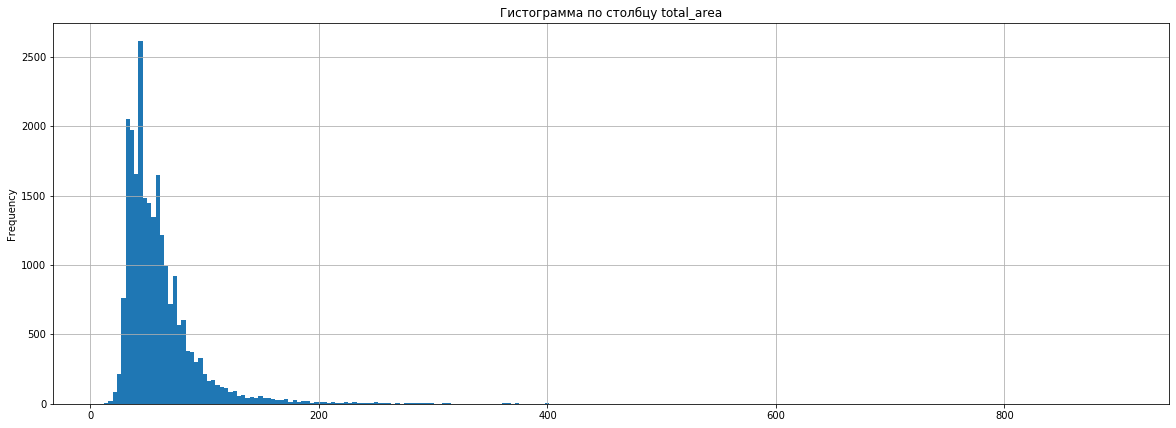

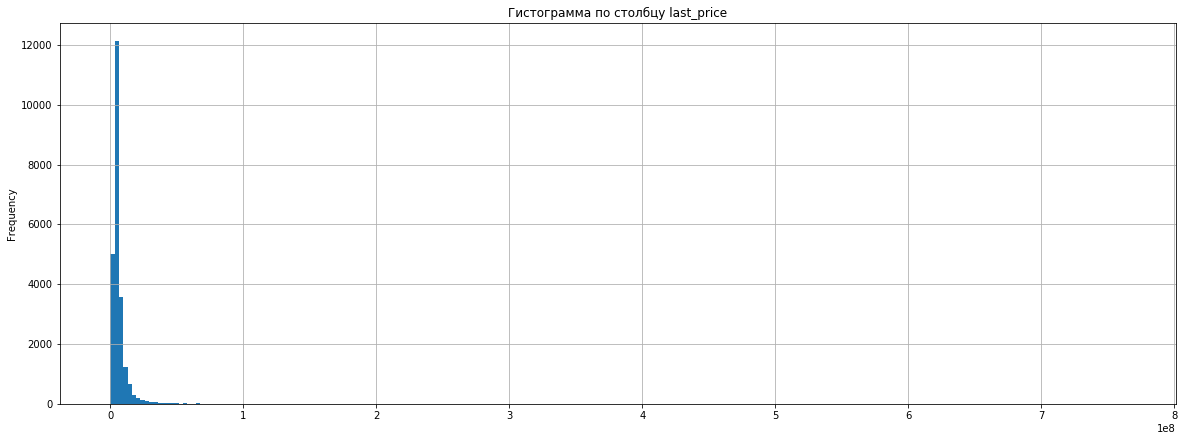

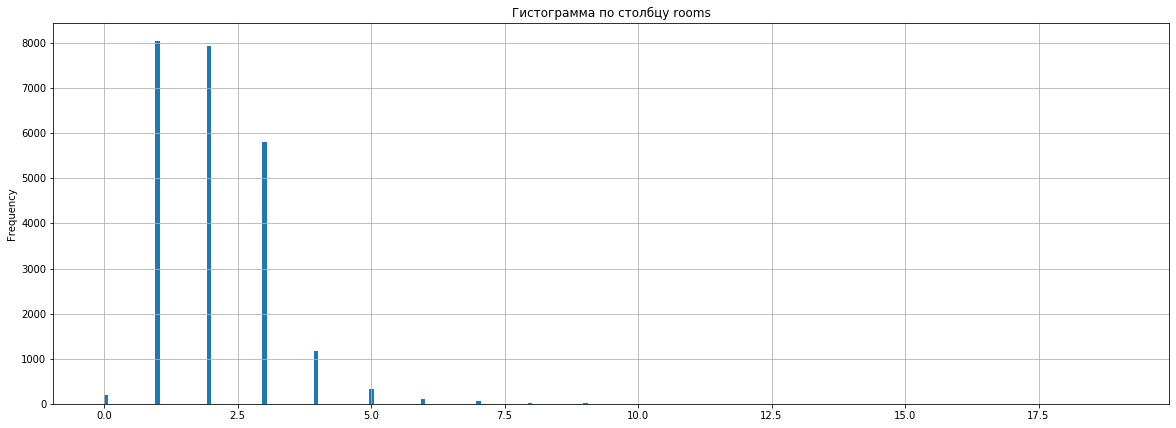

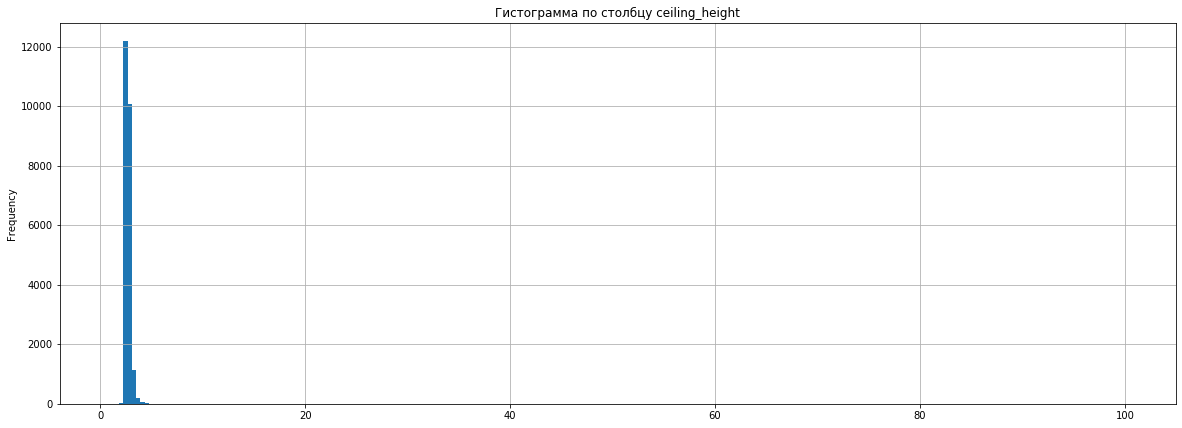

In [44]:
list_of_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for column in list_of_columns:
    data[column].plot(kind = 'hist', figsize = (20,7), grid=True, bins=237)
    plt.title('Гистограмма по столбцу ' + column)
    plt.show()

По всем четырём гистограммам видно, что распределение похоже на распределение Пуассона. Однако в данных есть выбросы, влияющие на информативность гистограмм. Например, из-за огромного по значению максимума цены (763 000 000) на гистограмме виден лишь пик близко к нулю. Тот же самый эффект наблюдается в гистограмме по высоте потолков.
Построим диаграммы размаха для каждого параметра: 'total_area', 'last_price', 'rooms', 'ceiling_height'

Диаграмма размаха для 'total_area':

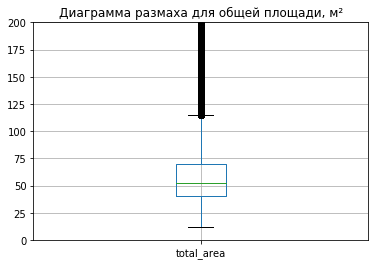

In [45]:
plt.ylim(0, 200)
data[['total_area']].boxplot()
plt.title('Диаграмма размаха для общей площади, м²')
plt.show()

Видно, что большая часть значений лежит приблизительно до 120 м². Значение первой и третьей квартили (40 и 69,8 м²) тоже выглядит правдоподобно.

Диаграмма размаха для 'last_price':

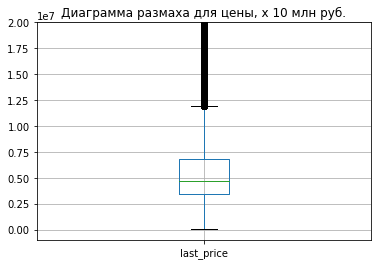

In [46]:
plt.ylim(-1000000, 20000000)
data[['last_price']].boxplot()
plt.title('Диаграмма размаха для цены, х 10 млн руб.')
plt.show()

По ценовому параметру большая часть значений находится до 12 000 000 руб. Квартили в 3 400 000 и 6 800 000 руб. соответствуют реальным данным.

Диаграмма размаха для 'rooms':

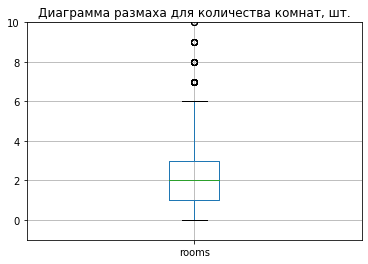

In [47]:
plt.ylim(-1, 10)
data[['rooms']].boxplot()
plt.title('Диаграмма размаха для количества комнат, шт.')
plt.show()

Здесь мы видим границу, в пределах которой находятся большинство значений, в 6 комнат. Реалистичным представляются и квартили Q1 и Q3 в 1 и 3 комнаты соответственно.

Диаграмма размаха для 'ceiling_height':

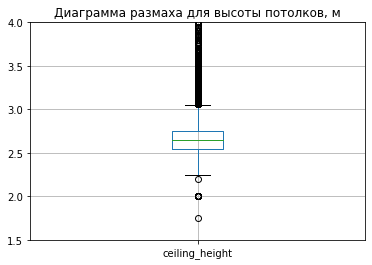

In [48]:
plt.ylim(1.5, 4)
data[['ceiling_height']].boxplot()
plt.title('Диаграмма размаха для высоты потолков, м')
plt.show()

Самые типичные потолки оказались высотой немногим более 3,1 м.

Теперь построим обновленные гистограммы для общей площади, цены, количества комнат и высоты потолков по значениям с отсечёнными хвостами.

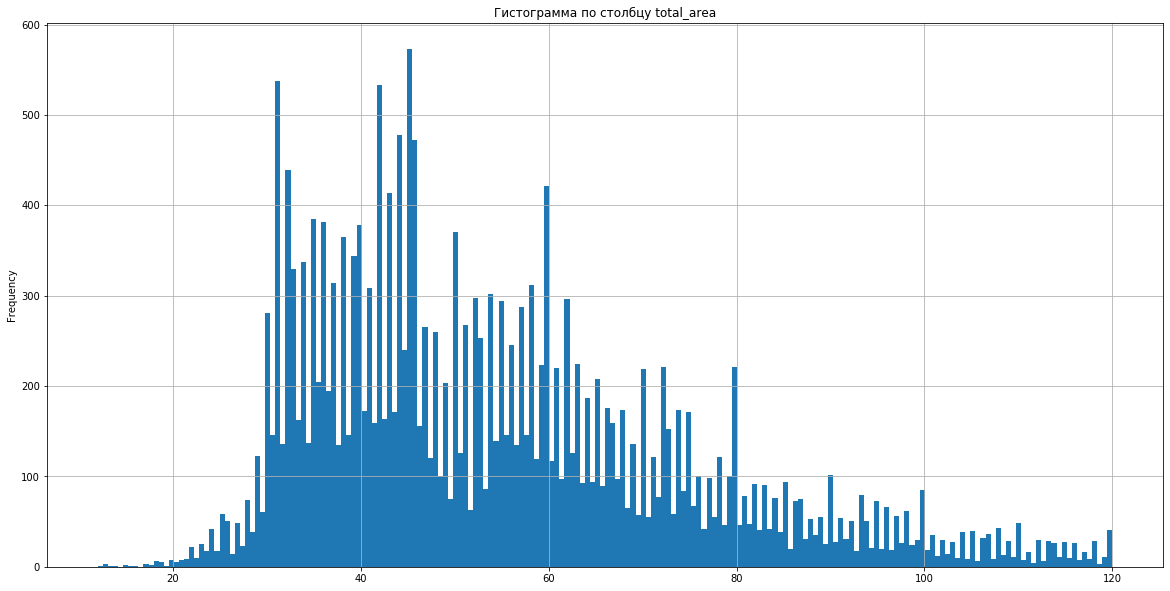

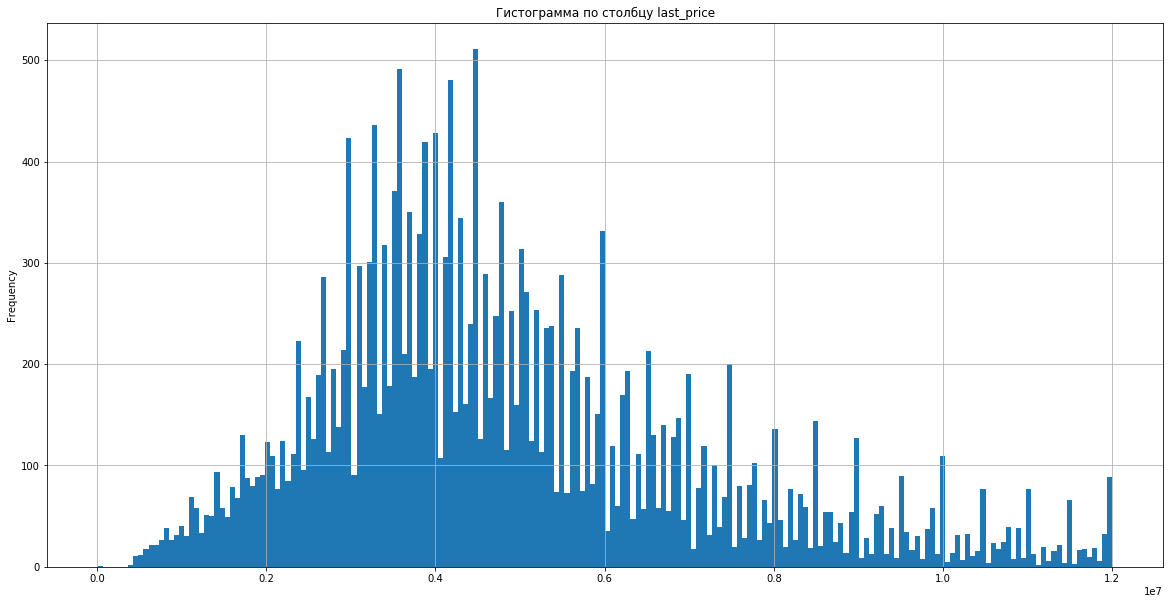

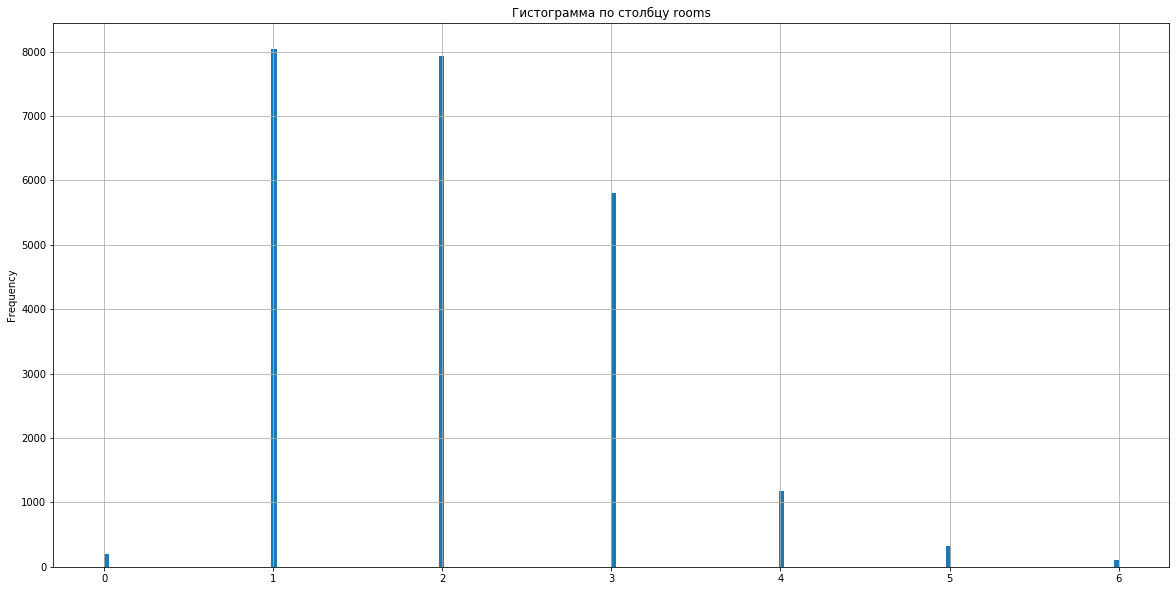

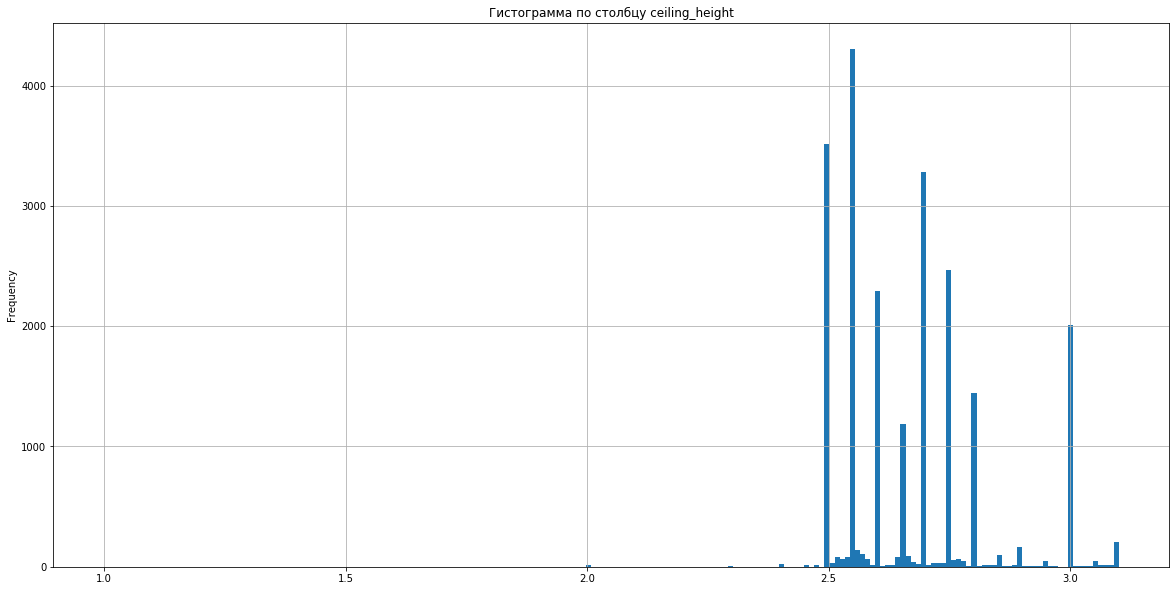

In [49]:
# построение гистограмм с помощью цикла
dict_of_columns = {'total_area' : 120, 'last_price' : 12000000, 'rooms' : 6, 'ceiling_height' : 3.1}

for column in dict_of_columns.keys():
    data[data[column] <= dict_of_columns[column]][column].plot(kind = 'hist', figsize = (20,10), grid=True, bins=200)
    plt.title('Гистограмма по столбцу ' + column)
    plt.show()

Теперь гистограммы стали намного нагляднее. Много локальных пиков в данных по общей площади можно объяснить той же типовой застройкой - на рынке много предложений типового жилья с определенными значениями общей площади. Такая же картина наблюдается в данных с высотой потолка.
По количеству комнат получилась вполне ожидаемое распределение - чаще всего покупаются и продаются 1- и 2-х комнатные квартиры - их количество практически идентично. Трёхкомнатных квартир уже меньше примерно на четверть, остальные встречаются тем реже, чем выше число комнат.
Распределение по цене в целом очень похоже на нормальное, но видно много локальных минимумов и максимумов. По всей видимости, это связано с тем, что люди при продаже склонны округлять цену до сотен тысяч (реже - до десятков тысяч).

### Изучение времени продажи квартиры

Посмотрим числовое описание выборки по времени продажи квартиры. Отдельно выведем на экран среднее и медиану по стролбцу 'days_exposition', а затем построим гистограмму.

In [50]:
data['days_exposition'].describe()

count   23675.000
mean      581.047
std      1036.259
min         1.000
25%        45.000
50%       124.000
75%       390.000
max      3160.000
Name: days_exposition, dtype: float64

In [51]:
print('Среднее значение времени продажи квартиры в днях: {:.0f}'.format(data['days_exposition'].mean()))
print('Медианное значение времени продажи квартиры в днях: {:.0f}'.format(data['days_exposition'].median()))

Среднее значение времени продажи квартиры в днях: 581
Медианное значение времени продажи квартиры в днях: 124


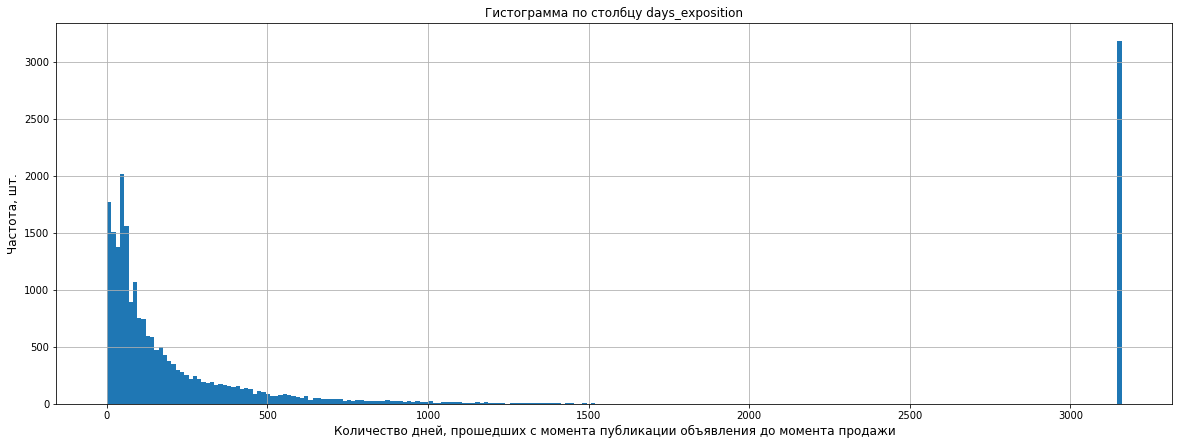

In [52]:
ax = data['days_exposition'].plot(kind = 'hist', figsize = (20,7), grid=True, bins=237)
ax.set_title('Гистограмма по столбцу days_exposition')
ax.set_xlabel('Количество дней, прошедших с момента публикации объявления до момента продажи', fontsize = 12)
ax.set_ylabel('Частота, шт.', fontsize = 12)
plt.show()

В данных есть огромный выброс на больших значениях времени продажи - это бывшие пропущенные значения. Этот выброс очень сильно влияет на среднее значение (именно поэтому среднее в несколько раз отличается от медианы). Получается, что средняя квартира продаётся в течение аж полутора лет (581 дней / 365 дней в году = 1,59 лет). При этом половина квартир продалась за период времени до 124 дней (это примерно 4 месяца).

Есть несколько возможных причин, по которым та или иная квартира может слишком долго продаваться: неадекватная цена, очень плохое состояние жилья, проблемы юридического характера и др. Всё это однако не является типичной ситуацией. Нам нужно отсечь выбросы, чтобы проанализировать, за какое время продаются "нормальные" квартиры без вышеперечисленных особенностей. Обратимся опять к диаграмме размаха.

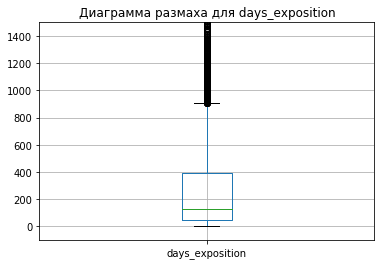

In [53]:
plt.ylim(-100, 1500)
data[['days_exposition']].boxplot()
plt.title('Диаграмма размаха для days_exposition')
plt.show()

Оказалось, что большая часть квартир продаётся в период до 900 дней. Отсечём лишнее и постоим гистограмму для выборки без выбросов.

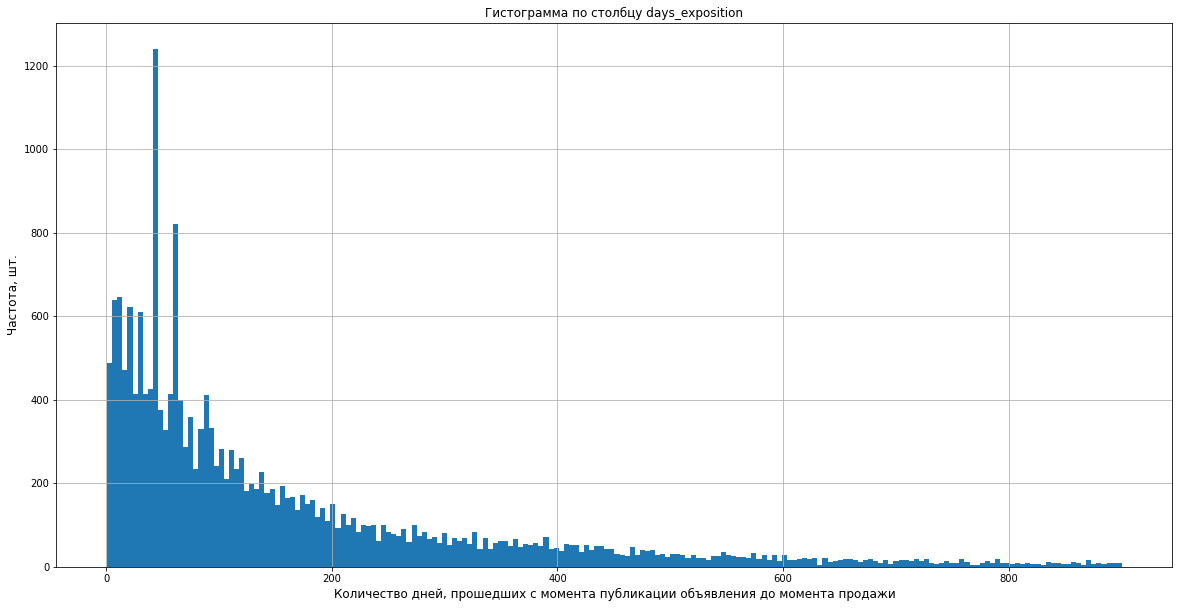

In [54]:
ax = data[data['days_exposition'] <= 900]['days_exposition'].plot(kind = 'hist', figsize = (20,10), grid=True, bins=200)
ax.set_title('Гистограмма по столбцу days_exposition')
ax.set_xlabel('Количество дней, прошедших с момента публикации объявления до момента продажи', fontsize = 12)
ax.set_ylabel('Частота, шт.', fontsize = 12)
plt.show()

In [55]:
print('Среднее значение для выборки по времени продажи квартиры без выбросов в днях: {:.0f}'.format(data[data['days_exposition'] <= 900]['days_exposition'].mean()))
print('Медианное значение для выборки по времени продажи квартиры без выбросов в днях: {:.0f}'.format(data[data['days_exposition'] <= 900]['days_exposition'].median()))

Среднее значение для выборки по времени продажи квартиры без выбросов в днях: 162
Медианное значение для выборки по времени продажи квартиры без выбросов в днях: 92


In [56]:
print('Характерные значения для выборки по days_exposition без выбросов:')
data[data['days_exposition'] <= 900]['days_exposition'].describe()

Характерные значения для выборки по days_exposition без выбросов:


count   20088.000
mean      162.304
std       177.252
min         1.000
25%        44.000
50%        92.000
75%       217.000
max       900.000
Name: days_exposition, dtype: float64

Вот теперь видно, что продажа обычной средней квартиры - дело хоть и не быстрое, но и не такое долгое, как нам это представилось поначалу. На графике видны ритмичные пики до 100 дней. Посмотрим, каким значениям они соответствуют:

In [57]:
data[data['days_exposition'] <= 100]['days_exposition'].value_counts().head(15)

45    880
60    538
7     234
30    208
90    203
4     174
3     158
5     152
14    148
9     142
8     139
20    139
44    138
11    135
18    129
Name: days_exposition, dtype: int64

Самый высокий пик соответствует значениям примерно 40-45 дней, второй по высоте пик - на значениях 55-60 дней. Другими словами, наиболее часто встречающееся количество дней от размещения объявления до продажи лежат именно в этих пределах.

**Вывод**

Продажа квартиры в среднем занимает 5,5 месяцев (162 дня), при этом в половине случаев сделка происходит в период до 3 месяцев (92 дня). Быстрой продажей можно считать продажу, произошедшую в первые 1,5 месяца (первый квартиль 44 дня) с момента публикации объявления, а необычно долгой - если квартира не продалась в течение 2,5 лет (900 дней) и более.

### Редкие и выбивающиеся значения

Создадим выборку данных, которая будет наилучшим образом характеризовать рынок недвижимости. Для этого исключим из набора данных редкие и выбивающиеся значения. Но искать такие значения по всем столбцам не имеет большого смысла, т.к. люди вряд ли будут выбирать квартиру исходя, например, из количества парков/водоёмов рядом. В основном для людей наиболее важную роль при рассмотрения вариантов к покупке жилья играют три фактора: число комнат, общий метраж и, разумеется, цена.

В пункте 4.1 было выяснено, что большинство квартир имеют не более 6 комнат, площадью не более 120 м² и стоимостью до 12 млн руб. Посчитаем, сколько данных мы потеряем, если уберём все предложения, не попадающие в эти рамки.

In [58]:
print('Если убрать из набора данных все квартиры, которые имеют более 6 комнат, площадью более 120 м² и стоимостью выше 12 млн руб, то мы потеряем {:.1%} данных.'.format(len(data.query('(last_price > 12000000) or (rooms > 6) or (total_area > 120)')) / len(data)))

Если убрать из набора данных все квартиры, которые имеют более 6 комнат, площадью более 120 м² и стоимостью выше 12 млн руб, то мы потеряем 8.8% данных.


Убрав всего 8,8% данных, мы уберём редко встречающиеся дорогие элитные квартиры с большим количеством комнат и огромной площадью. Таких квартир мало, но они вносят свой вклад в расчёт средних значений, а исключив их, мы сможем адекватно оценить рынок жилья.

Сохраним отфильтрованные данные в отдельный датафрейм, применив метод .query(), и выведем на экран числовое описание столбцов 'last_price', 'rooms', 'total_area'.

In [59]:
filtered_data = data.query('(last_price <= 12000000) and (rooms <= 6) and (total_area <= 120)')
filtered_data[['last_price', 'rooms', 'total_area']].describe()

,last_price,rooms,total_area
count,21599.000,21599.000,21599.000
mean,4849284.500,1.922,52.984
std,2242119.250,0.897,18.229
min,12190.000,0.000,12.000
25%,3300000.000,1.000,39.000
50%,4400000.000,2.000,49.100
75%,6000000.000,3.000,63.300
max,12000000.000,6.000,120.000


**Вывод**

Был создан датафрейм filtered_data, не содержащий редких значений по трём параметрам, больше всего влияющим на привлекательность объявлений - цена, количество комнат и общая площадь.

### Факторы, влияющие на стоимость квартиры

Теперь предстоит выяснить, какие факторы больше всего влияют на стоимость квартиры. Изучим, зависит ли цена от количества квадратных метров. Построим график зависимости цены от метража. У нас много данных, поэтому нагляднее всего будет построить график типа *hexbin*, чтобы увидеть частоту попадания в ту или иную область.

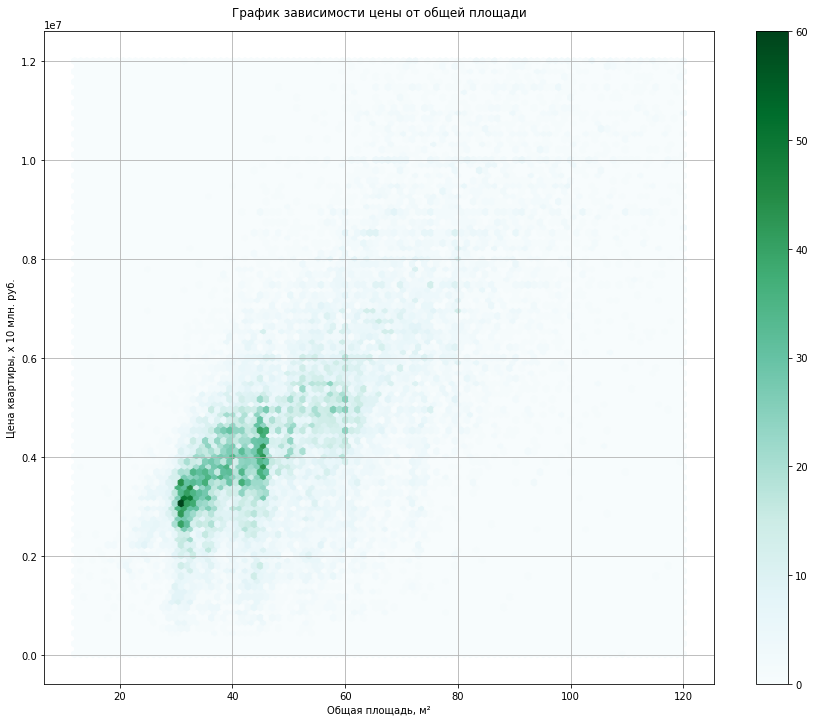

In [60]:
ax = filtered_data.plot(x='total_area', y='last_price', kind='hexbin', figsize=(15, 12), sharex=False, grid=True)
ax.set_title('График зависимости цены от общей площади', pad=15)
ax.set_xlabel('Общая площадь, м²')
ax.set_ylabel('Цена квартиры, х 10 млн. руб.')
plt.show()

В самой "густой" области распологаются наиболее частые сочетания площади и цены - квартиры площадью от 30 до 50 м² и стоимостью от 2,5 до 5 млн руб. В целом картина такова, как и ожидалось - с увеличением площади увеличивается и стоимость. Но это лишь в среднем. Можно найти варианты квартир с большой общей площадью и довольно низкой ценой. Однако есть и совсем пустые зоны: маленькие по метражу квартиры не стоят дорого. Посчитаем корреляцию для этих двух величин.

In [61]:
print('Корреляция между общей площадью и ценой квартир:', filtered_data['total_area'].corr(filtered_data['last_price']))

Корреляция между общей площадью и ценой квартир: 0.7031379255535636


Корреляция в 0.7 говорит о наличии ощутимой связи. Получается, увеличение площади сопровождается прибавкой в цене, но, как мы уже увидели из графика, так бывает не всегда. Цена зависит не только от площади, но и от района расположения квартиры, наличия инфрастуктуры, состояния самого жилья и т.д. Поэтому для квартир с одинаковым метражом цена может отличаться в разы.

Посмотрим теперь, как зависит стоимость от числа комнат. Построим график зависимости и посчитаем корреляцию.

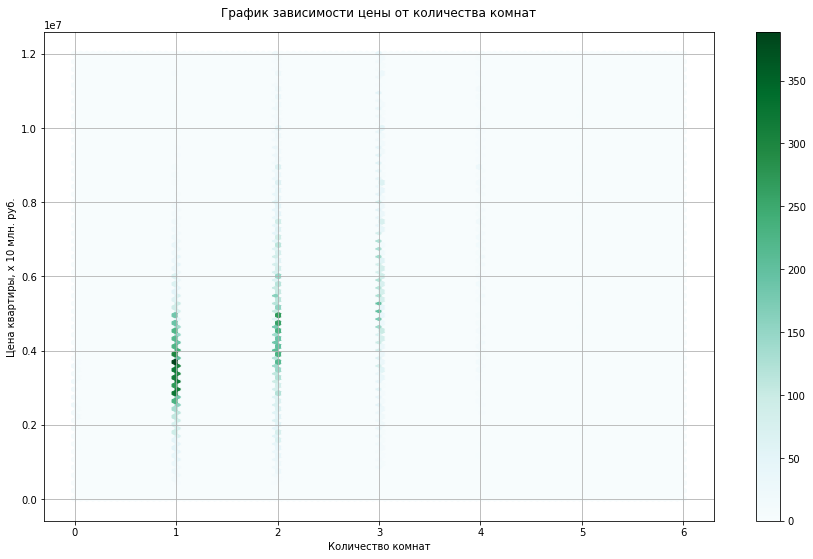

In [62]:
ax = filtered_data.plot(x='rooms', y='last_price', kind='hexbin', figsize=(15, 9), sharex=False, grid=True)
ax.set_title('График зависимости цены от количества комнат', pad=15)
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Цена квартиры, х 10 млн. руб.')
plt.show()

In [63]:
print('Корреляция между количеством комнат и ценой квартир:', filtered_data['rooms'].corr(filtered_data['last_price']))

Корреляция между количеством комнат и ценой квартир: 0.44087156256615834


Цена зависит от количества комнат намного слабее, чем от метража, и график подтверждает такую связь. Например, если у человека есть 4 млн руб., то посмотрев на график, чтобы понять, квартиру с каким количеством комнат он сможет себе позволить, получится, что он может купить за эти деньги как одно-, так и двух- и даже трёхкомнатную квартиру. Но мы, конечно, знаем, что современные однокомнатные квартиры могут быть по площади сопоставимы с трёшками в хрущевке, да и другие параметры, упомянутые выше (район, инфрастуктура и т.д) тоже играют в ценообразовании не последнюю роль.

Теперь изучим зависимость цены от типа этажа (первый, последний, другой), построим график зависимости цены от типа этажа (1 - первый, 2 - последний, 3 - другой):

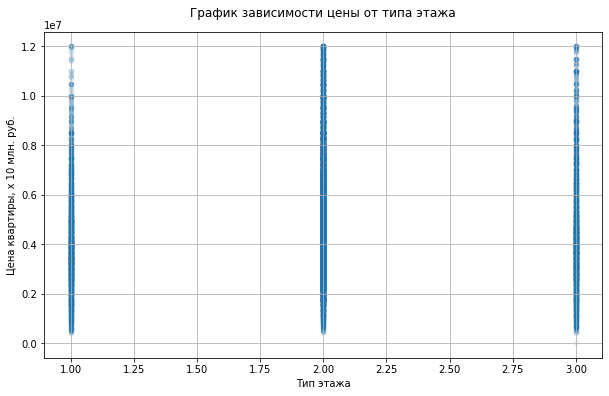

In [64]:
ax = filtered_data.plot(x='floor_type', y='last_price', kind='scatter', figsize=(10, 6), grid=True, alpha=0.1)
ax.set_title('График зависимости цены от типа этажа', pad=15)
ax.set_xlabel('Тип этажа')
ax.set_ylabel('Цена квартиры, х 10 млн. руб.')
plt.show()

По такому графику сложно делать выводы, так как все три столбика выглядят одинаково за исключением плотности значений - самая низкая у первого этажа (значение 1), немного выше у последнего этажа (значение 3), и наибольшее количество объявлений с квартирами, расположенными на промежуточных этажах (значение 2). Посмотрим на среднее значение стоимости по типу этажа, построим график.

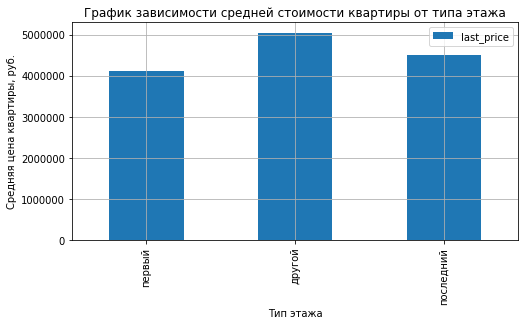

In [65]:
labels_floor = ['первый', 'другой', 'последний']
ax = filtered_data.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(8, 4), grid=True)
ax.set_xticklabels(labels_floor)
ax.set_title('График зависимости средней стоимости квартиры от типа этажа')
ax.set_xlabel('Тип этажа')
ax.set_ylabel('Средняя цена квартиры, руб.')
plt.show()

Диаграмма показывает, что меньше всего стоят квартиры, расположенные на первом этаже - средняя цена таких квартир почти на миллион (а это в нашем случае 20%) отличается от средней цены квартир с промежуточных этажей. Средняя стоимость квартир, находящихся на последних этажах, также ниже средней цены этажной категории "другой", но разница здесь в половину меньше - в абсолютном значении это около 500 000 руб. Отсюда можно сделать вывод, что первые этажи пользуются гораздо более низким спросом по сравнению с остальными, что конечно же отражается на цене. Именно поэтому большинство современных застройщиков первые этажи жилых домов сразу проектируют как нежилые, а предназначенные под коммерческие проекты.

Перейдём к изучению зависимости между ценой и удалённостью от центра. В данном случае график *hexbin* будет менее наглядным, чем *scatter*, так как разброс значений здесь более равномерный.

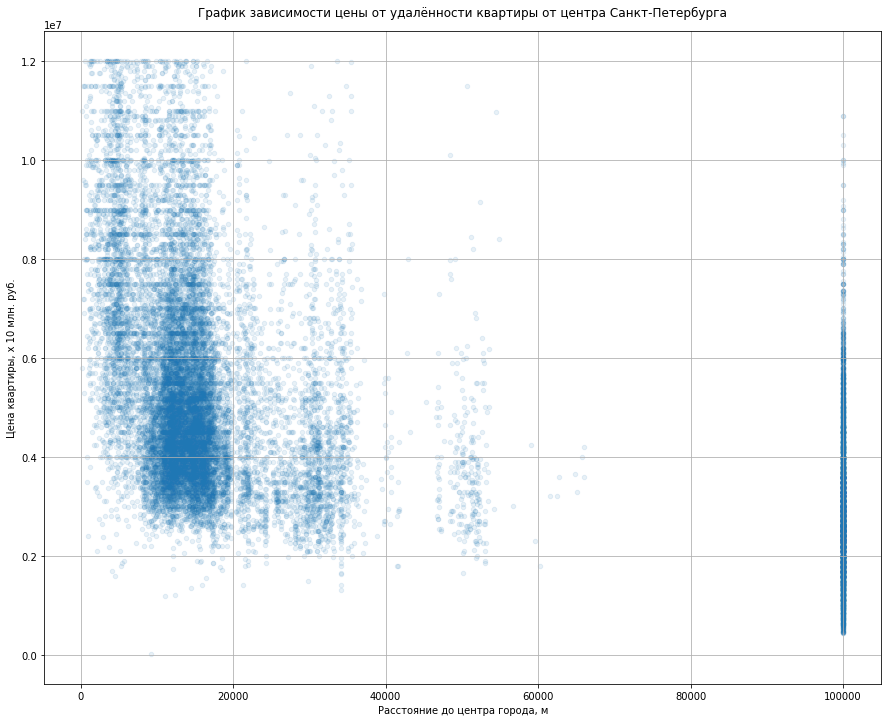

In [66]:
ax = filtered_data.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(15, 12), grid=True, alpha=0.1)
ax.set_title('График зависимости цены от удалённости квартиры от центра Санкт-Петербурга', pad=15)
ax.set_xlabel('Расстояние до центра города, м')
ax.set_ylabel('Цена квартиры, х 10 млн. руб.')
plt.show()

В целом видно, что чем дальше от центра города, тем ниже цена. Плотная вертикальная линия на значении оси абсцисс 100000 - это результат заполнения пропусков. Наиболее плотная область наблюдается между значениями удаленности от центра от 7000 до 20000 м и с ценой от 2,5 до 6,5 млн руб. Это говорит снова говорит нам о том, что цена зависит от множества факторов (в том числе и от удалённости от центра). Вычислим корреляцию между параметрами cityCenters_nearest и last_price.

In [67]:
print('Корреляция между удалённостью от центра города и ценой квартир:', filtered_data['cityCenters_nearest'].corr(filtered_data['last_price']))

Корреляция между удалённостью от центра города и ценой квартир: -0.5301996716299849


Значение корреляции отрицательное, так как у нас обратная зависимость: с увеличением расстояния от центра стоимость снижается. Величина 0.53 говорит о том, что связь есть, но не слишком сильная. Для одного и того же расстояния от центра стоимость квартир может различаться очень значительно.

А есть ли зависимость стоимости квартиры от даты размещения объявления (дня недели, месяца и года)? Начнём с дней недели и построим график.

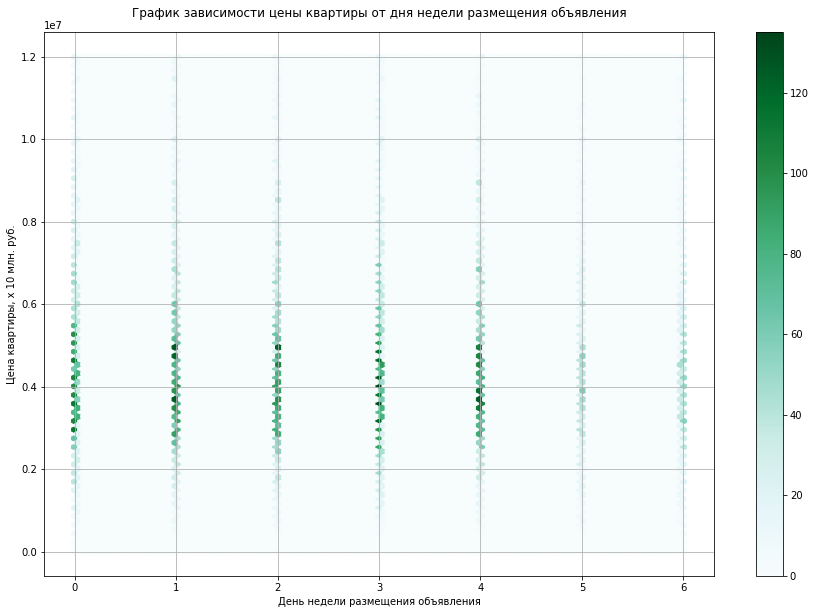

In [68]:
ax = filtered_data.plot(x='weekday_exposition', y='last_price', kind='hexbin', figsize=(15, 10), sharex=False, grid=True)
ax.set_title('График зависимости цены квартиры от дня недели размещения объявления', pad=15)
ax.set_xlabel('День недели размещения объявления')
ax.set_ylabel('Цена квартиры, х 10 млн. руб.')
plt.show()

Меньше всего объявлений размещают в выходные - там плотность значений самая низкая. В будние дни распределение кажется равномерным. В целом такой график неудобно анализировать и сложно делать из него какие-либо выводы. В данном случае удобнее смотреть на средние значения.

В прошлом пункте мы избавились от выбросов в данных (в том числе по цене), поэтому обратимся именно к среднему значению, а не к медианному. Построим столбцатую диаграмму зависимости средней цены квартиры от дня недели, в который было размещено объявление.

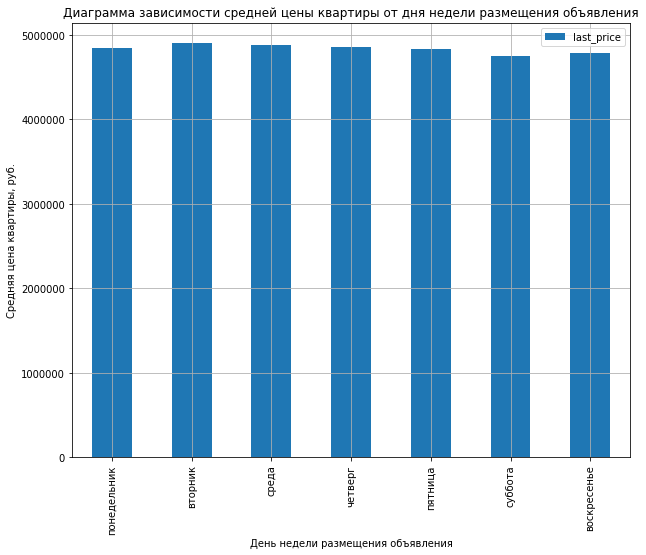

In [69]:
labels = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
ax = filtered_data.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(10, 8), grid=True)
ax.set_xticklabels(labels)
ax.set_title('Диаграмма зависимости средней цены квартиры от дня недели размещения объявления')
ax.set_xlabel('День недели размещения объявления')
ax.set_ylabel('Средняя цена квартиры, руб.')
plt.show()

Из диаграммы видно, что средняя стоимость квартир выше всего у предложений, размещённых во вторник и среду. В понедельники, четверги и пятницы средняя цена объявления немного ниже. Самая низкая средняя стоимость - в выходные дни, причём в субботу она меньше, чем в воскресенье. Получается, что в выходные ниже не только количество объявлений, но и средняя цена. Однако разница между всеми этими значениями весьма незначительная.
Выведем на экран корреляцию между ценой и днями недели.

In [70]:
print('Корреляция между днём недели размещения объявлений и ценой квартир:', filtered_data['weekday_exposition'].corr(filtered_data['last_price']))

Корреляция между днём недели размещения объявлений и ценой квартир: -0.013768672380915895


Величина корреляции в 0.014 означает практическое отсутствие зависимости между ценой и днём недели. А знак минус показывает обратную зависимость - ближе к выходным (с возрастанием дня недели) цена уменьшается.

Перейдём к исследованию зависимости стоимости от месяца и года размещения объявления. Выведем график, как меняется средняя цена квартир от месяца и года размещения объявления.

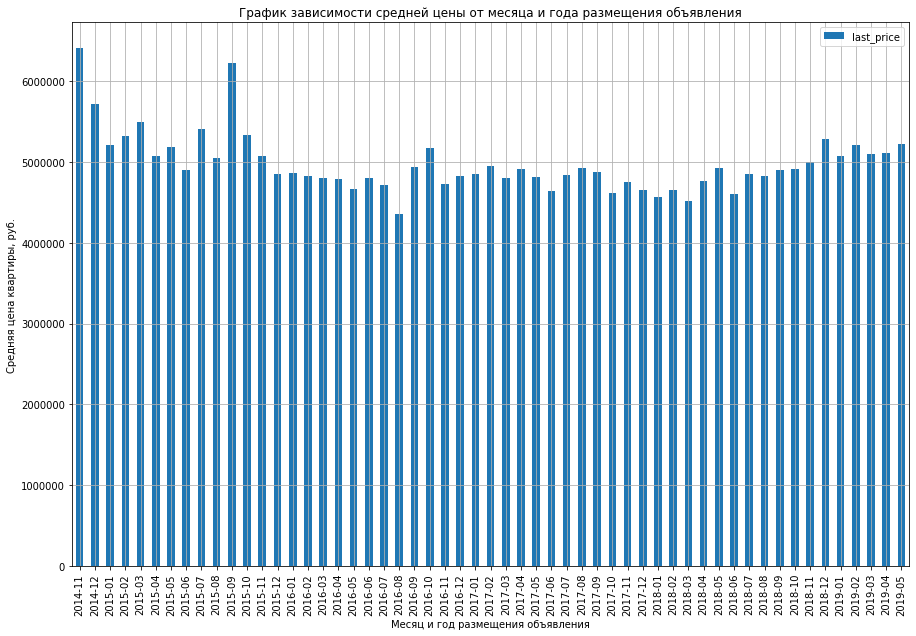

In [71]:
ax = filtered_data.pivot_table(index='month_year_exposition', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(15, 10), grid=True)
ax.set_title('График зависимости средней цены от месяца и года размещения объявления')
ax.set_xlabel('Месяц и год размещения объявления')
ax.set_ylabel('Средняя цена квартиры, руб.')
plt.show()

Средняя цена квартир поднималась выше отметки в 6 000 000 руб лишь дважды за рассматриваемый период - в ноябре 2014 и в сентябре 2015. За период с ноября 2014 по ноябрь 2015 средняя стоимость была всегда выше 5 млн руб, кроме июня 2015. Начиная с декабря 2015 средняя цена снизилась и была всегда ниже 5 млн руб (исключение - октябрь 2016) вплоть до ноября 2018, после чего каждый месяц до конца рассматриваемого периода вновь стала превышать эту отметку. В целом получается, что с течением времени средняя стоимость жилья то снижается, то вновь растёт.

**Вывод**

Стоимость квартиры зависит от нескольких факторов, но наиболее сильно - от площади жилья, и это логично - чем больше квадратных метров, тем больше цена. От количества комнат цена зависит в меньшей мере, и это понятно - бывают большие однушки и маленькие трёшки. Также видна зависимость цены от типа этажа квартиры: самый недорогой вариант - это первый этаж, на втором месте - последний, а промежуточные этажи самые дорогие. Удалённость жилья от центра - ещё один значимый фактор: здесь имеется отрицательная корреляция - чем дальше от центра, тем дешевле. А вот между днём недели публикации объявления и ценой практически нет никакой связи. Та же картина наблюдается при выявлении зависимости между месяцем и годом публикации и стоимостью.


### Анализ десяти населённых пунктов с наибольшим числом объявлений

Составим выборку 10 населённых пунктов с наибольшим числом объявлений. Но чтобы выборка была верной, сначала приведём все названия населённых пунктов к единому виду (исключим слова "поселок", "деревня" и т.д. из датафрейма)

In [72]:
# удаление типа населённых пунктов перед названием
data['locality_name'] = data['locality_name'].str.replace('деревня ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('поселок ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('посёлок ', '', regex = True)
data['locality_name'] = data['locality_name'].str.replace('село ', '', regex = True)

# вывод на экран 10 населённых пунктов с наибольшим количеством объявлений
data['locality_name'].value_counts().head(10)

Санкт-Петербург    15746
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

In [73]:
# создание нового датафрейма, куда входят только строки с квартирами из 10 населённых пунктов с наибольшим количеством объявлений
data_10_local = data[data['locality_name'].isin(['Санкт-Петербург', 'Мурино', 'Шушары', 'Всеволожск', 'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Кудрово', 'Выборг'])]

# значения, которые содержит столбец locality_name в новом датафрейме
data_10_local['locality_name'].value_counts()

Санкт-Петербург    15746
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              307
Выборг               237
Name: locality_name, dtype: int64

Посчитаем среднюю цену квадратного метра в этих населённых пунктах.

In [74]:
# подсчёт средней цены квадратного метра по населённым пунктам
print('Сводная таблица с ценой 1 м² и количеством объявлений для топ-10 населённых пунктов:')
print()
data_10_local_pivot = data_10_local.groupby('locality_name').agg({'price_per_meter2':'mean', 'floor':'count'}).reset_index()
data_10_local_pivot.set_axis(['locality_name', 'price_per_meter2', 'number_of_ads'], axis='columns', inplace=True)
print(data_10_local_pivot.sort_values(by='price_per_meter2', ascending=False))

Сводная таблица с ценой 1 м² и количеством объявлений для топ-10 населённых пунктов:

     locality_name  price_per_meter2  number_of_ads
8  Санкт-Петербург        114840.180          15746
7           Пушкин        103125.820            369
4          Кудрово         95324.930            472
6        Парголово         90175.914            327
5           Мурино         86087.516            590
9           Шушары         78677.367            440
3          Колпино         75424.578            338
2          Гатчина         68746.148            307
0       Всеволожск         68654.477            398
1           Выборг         58141.910            237


Определим, в каких населённых пунктах самый дорогой квадратный метр, а в каких - самый дешёвый. Для этого найдём квартили. Будем считать, что все населённые пункты с ценой за 1 м² более третьей квартили будут относится к дорогой категории, а пункты с ценой менее первой квартили - к дешёвой.

In [75]:
# расчёт квартилей по средней цене за квадратный метр
print('Квартили по средней цене за м²:')
data_10_local_pivot['price_per_meter2'].quantile([0.25, 0.50, 0.75])

Квартили по средней цене за м²:


0.250   70415.756
0.500   82382.441
0.750   94037.676
Name: price_per_meter2, dtype: float64

In [76]:
# определение населённых пунктов с самой высокой и низкой стоимостью жилья
print('Населённые пункты с самой высокой стоимостью жилья:')
print(data_10_local_pivot[data_10_local_pivot['price_per_meter2'] > 94037.676])
print()
print()
print('Населённые пункты с самой низкой стоимостью жилья:')
print(data_10_local_pivot[data_10_local_pivot['price_per_meter2'] < 70415.755])

Населённые пункты с самой высокой стоимостью жилья:
     locality_name  price_per_meter2  number_of_ads
4          Кудрово         95324.930            472
7           Пушкин        103125.820            369
8  Санкт-Петербург        114840.180          15746


Населённые пункты с самой низкой стоимостью жилья:
  locality_name  price_per_meter2  number_of_ads
0    Всеволожск         68654.477            398
1        Выборг         58141.910            237
2       Гатчина         68746.148            307


**Вывод**

Самая высокая цена за квадратный метр - в Санкт-Петербурге, Пушкине и Кудрово. Самая низкая - в Гатчине, Всеволожске и Выборге.

### Анализ изменения цены по степени удалённости от центра

Выделим отдельный датафрейм с предложениями в Санкт-Петербурге.

In [77]:
data_spb = data[(data['locality_name'] == 'Санкт-Петербург')].copy()
data_spb.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter2,weekday_exposition,month_year_exposition,floor_type,living_area_part,kitchen_area_part
0,20,13000000.000,108.000,2019-03-07,3,2.700,16,51.000,8,False,...,482.000,2,755.000,3160,120370.367,3,2019-03,2,0.472,0.231
2,10,5196000.000,56.000,2015-08-20,2,2.550,5,34.300,4,False,...,90.000,2,574.000,558,92785.711,3,2015-08,2,0.613,0.148
3,0,64900000.000,159.000,2015-07-24,3,2.600,14,96.892,9,False,...,84.000,3,234.000,424,408176.094,4,2015-07,2,0.609,0.145
4,2,10000000.000,100.000,2018-06-19,2,3.030,14,32.000,13,False,...,112.000,1,48.000,121,100000.000,1,2018-06,2,0.320,0.410
7,5,7915000.000,71.600,2019-04-18,2,2.750,24,40.689,22,False,...,10000.000,0,10000.000,3160,110544.695,3,2019-04,2,0.568,0.264


Посчитаем среднюю цену каждого километра удалённости от центра города. Для этого посчитаем расстояние до центра города в километрах, округленную до целого, и сохраним результат в отдельный столбец 'cityCenters_nearest_km'. Затем посчитаем среднюю цену каждого километра и выведем график зависимости цены за 1 м² от удалённости от центра.

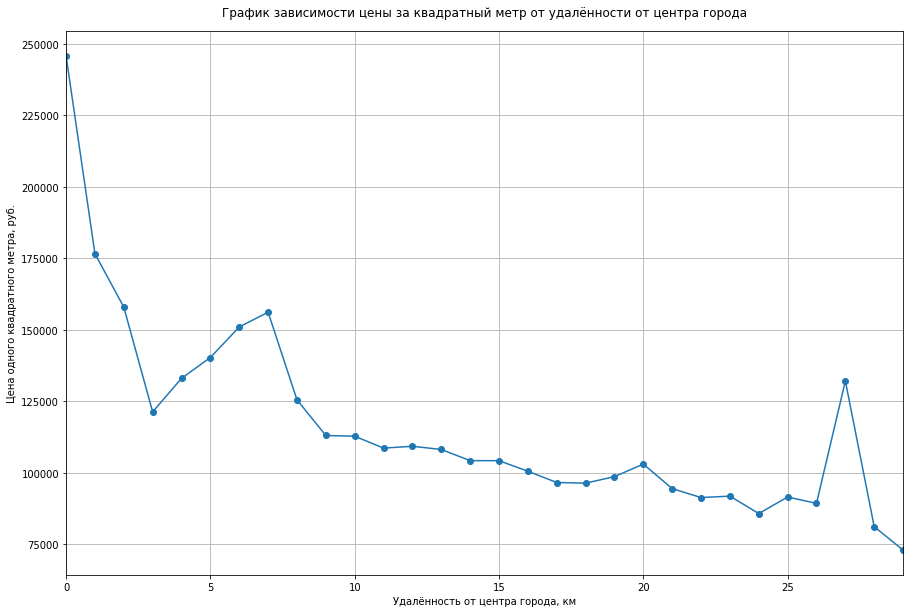

In [78]:
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest'] / 1000
data_spb['cityCenters_nearest_km'] = data_spb['cityCenters_nearest_km'].round()

# расчёт средней цены за м² за каждый километр и построение графика зависимости цены за 1 м² от удалённости от центра
ax = data_spb.groupby('cityCenters_nearest_km')['price_per_meter2'].mean().plot(style='o-', figsize=(15, 10), grid=True)
ax.set_title('График зависимости цены за квадратный метр от удалённости от центра города', pad=15)
ax.set_xlabel('Удалённость от центра города, км')
ax.set_ylabel('Цена одного квадратного метра, руб.')
plt.show()

Из графика видно, что на отметке 7 км от центра начинается резкое снижение цены за квадратный метр. Отсюда можно сделать вывод, что в центральную зону Санкт-Петербурга входит область с удалённостью от центра не более 7 км.
После резкого снижения цены от 7 км к 9 км начинается более плавный спад. Однако на отметке в 27 км наблюдается пик - в этом районе стоимость недвижимости эквивалентна стоимости недвижимости в центральной зоне. Вероятно, здесь находится элитный район с дорогой недвижимостью.

**Вывод**

К центральной зоне города можно отнести область радиусом 7 км от центра. В целом цена квадратного метра убывает по мере отдалённости от центра Санкт-Петербурга, но так бывает не всегда. 

### Сравнение выводов по квартирам в центре и общих выводов по всему городу

Выделим сегмент квартир в центре и изучим следующие параметры: площадь, цена, число комнат, высота потолков. 

In [79]:
# датафрейм с квартирами в центре Санкт-Петербурга
data_spb_center = data_spb[(data_spb['cityCenters_nearest_km'] <= 7)].copy()

data_spb_center[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,3541.000,3541.000,3541.000,3541.000
mean,93.131,14872108.000,2.835,2.990
std,59.372,24270900.000,1.448,0.731
min,12.000,1600000.000,0.000,2.400
25%,57.000,6650000.000,2.000,2.700
50%,78.700,9200000.000,3.000,3.000
75%,110.000,14500000.000,3.000,3.150
max,631.200,763000000.000,19.000,32.000


Средняя площадь квартир в центре - 93,131 м², минимальное значение - 12 м², а максимальное - 631,2 м². При этом медианное значение меньше, чем среднее, что говорит о том, что значимый вклад в среднее значение вносят большие значения площади.
Разброс значений цен довольно высокий: от 1 600 000 руб (это минимум), а есть за 763 000 000 руб (максимум) - на это также указывает большое значение стандартного отклонения. В значениях количества комнат наблюдается распределение, близкое к равномерному - значение среднего и медианы очень мало отличаются. Но некоторое количество выбросов всё же имеется, судя по наличию квартиры с 19 комнатами (максимальное значение столбца 'rooms'). По высоте потолков разброс значений тоже невысок (среднее значение - 2,99 м, медиана - 3,00 м), однако и здесь без выбросов не обошлось.

Изучим, как часто в данных этих четырёх столбцов встречается то или иное значение. Для этого построим гистограммы для каждого параметра.

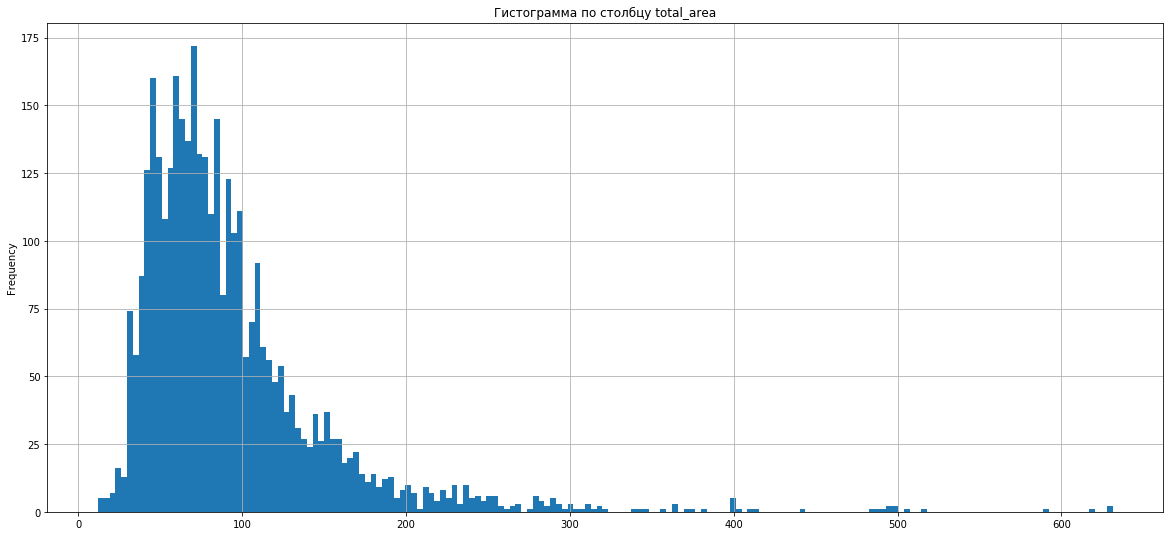

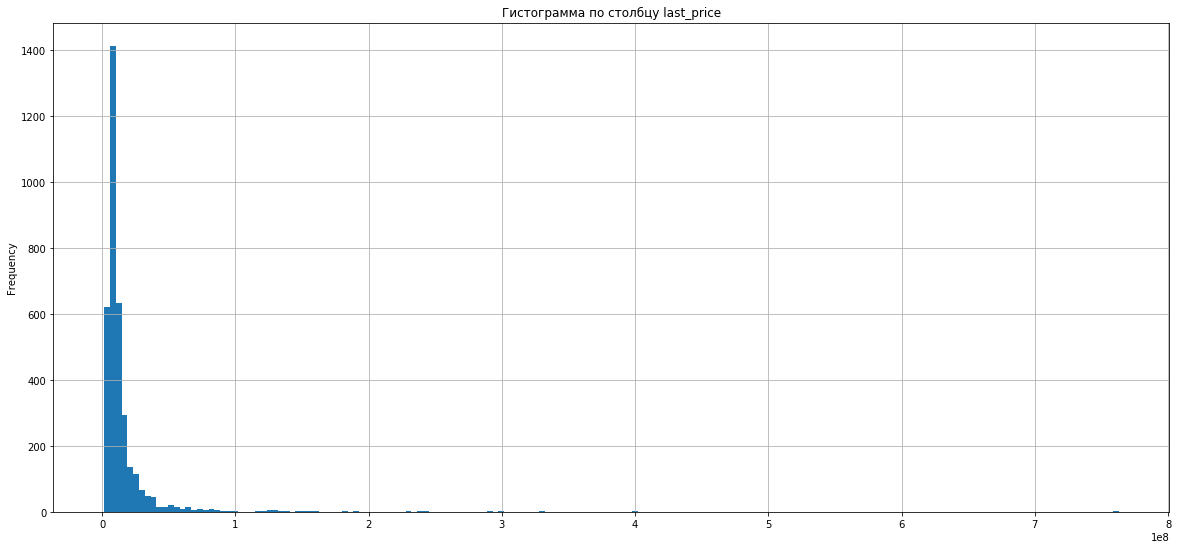

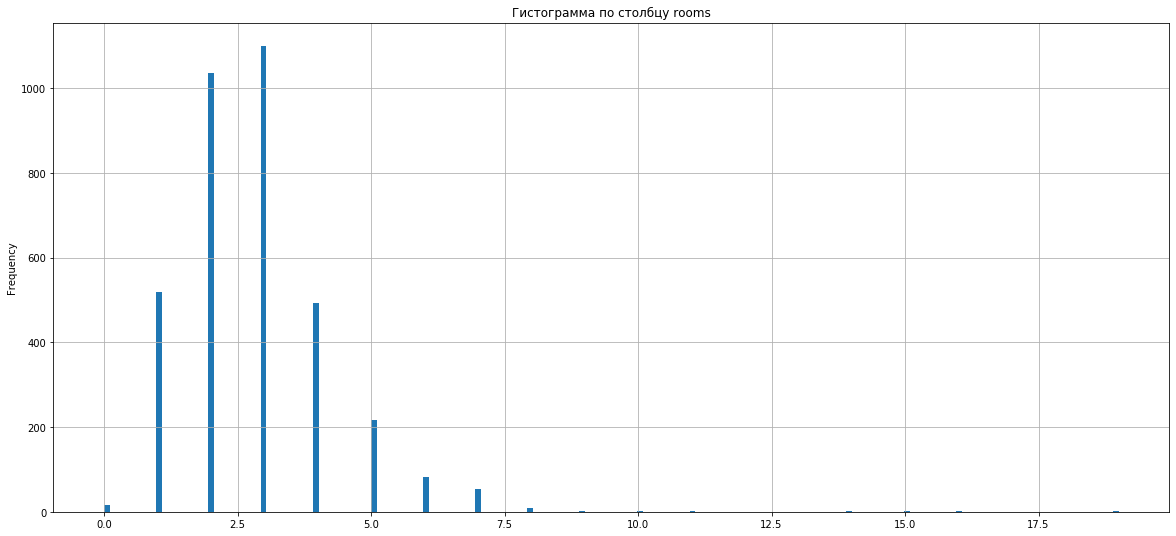

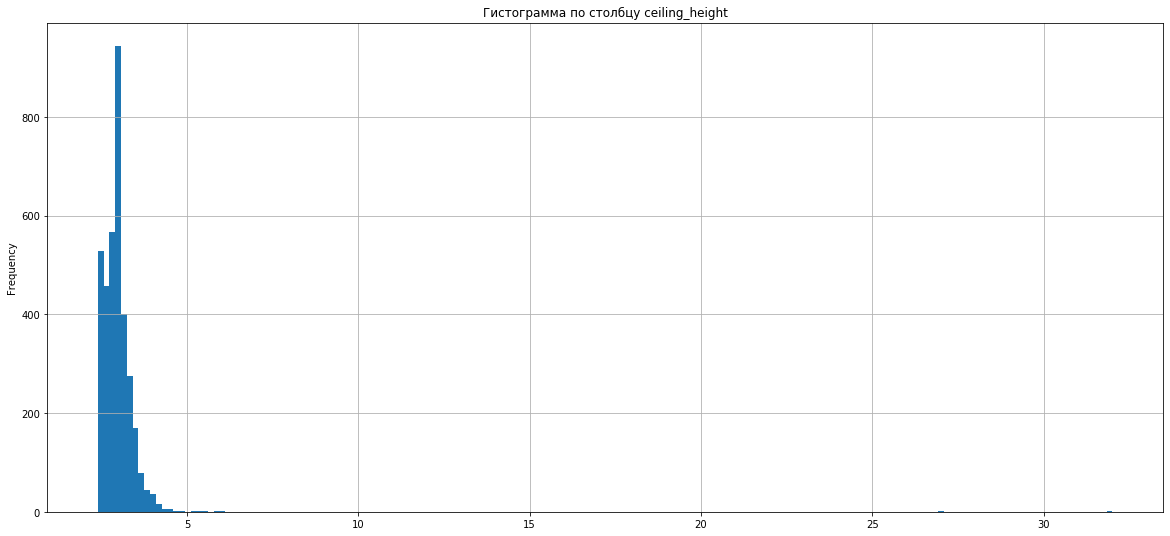

In [80]:
# построение гистограмм с помощью цикла
list_of_columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']

for column in list_of_columns:
    data_spb_center[column].plot(kind = 'hist', figsize = (20,9), grid=True, bins=175)
    plt.title('Гистограмма по столбцу ' + column)
    plt.show()

Гистограмма по количеству комнат уже сейчас выглядит довольно информативно: видно, что самые часто встречающиеся в продаже квартиры в центре Питера - это трёхкомнатные квартиры. Двухкомнатных немного меньше, а вот однокомнатные встречаются практические так же часто, как и четырёхкомнатные (интересное наблюдение!). Пятикомнатных квартир в общей массе тоже немало - всего в 5 раз меньше, чем самых популярных трёхкомнатных. 

Глядя на гистограмму по общей площади квартир (форма которой близка к распределению Пуассона), уже можно сделать вывод, что основная масса значений для площади квартир лежит до 200 м². Но среднюю часть распределения хочется рассмотреть поближе, а здесь нам мешают это сделать выбросы. Гистограммы по цене и высоте потолков выглядят совсем неинформативно.

Построим диаграммы размаха для общей площади, цены и высоты потолков.

Диаграмма размаха для 'total_area':

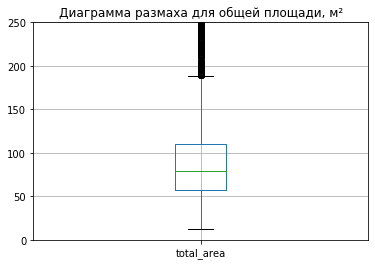

In [81]:
plt.ylim(0, 250)
data_spb_center[['total_area']].boxplot()
plt.title('Диаграмма размаха для общей площади, м²')
plt.show()

Основная масса значений, как мы и увидели из гистограммы выше, лежит до уровня немного ниже отметки 200 м².

Диаграмма размаха для 'last_price':

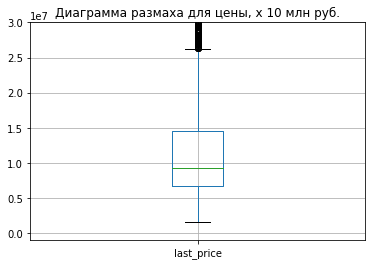

In [82]:
plt.ylim(-1000000, 30000000)
data_spb_center[['last_price']].boxplot()
plt.title('Диаграмма размаха для цены, х 10 млн руб.')
plt.show()

Тут верхний ус упирается в значение около 26 000 000 руб.

Диаграмма размаха для 'ceiling_height':

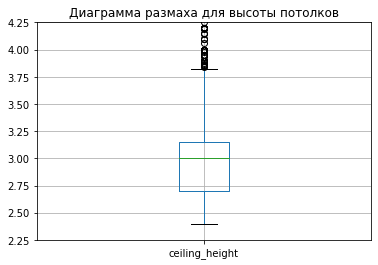

In [83]:
plt.ylim(2.25, 4.25)
data_spb_center[['ceiling_height']].boxplot()
plt.title('Диаграмма размаха для высоты потолков')
plt.show()

Видно, что большинство квартир в центре имеет высоту потолков до 3.8 м.

Построим новые гистограммы для 'total_area', 'last_price', 'ceiling_height' с отсечением выбросов по значениям, определённым по диаграммам размаха.

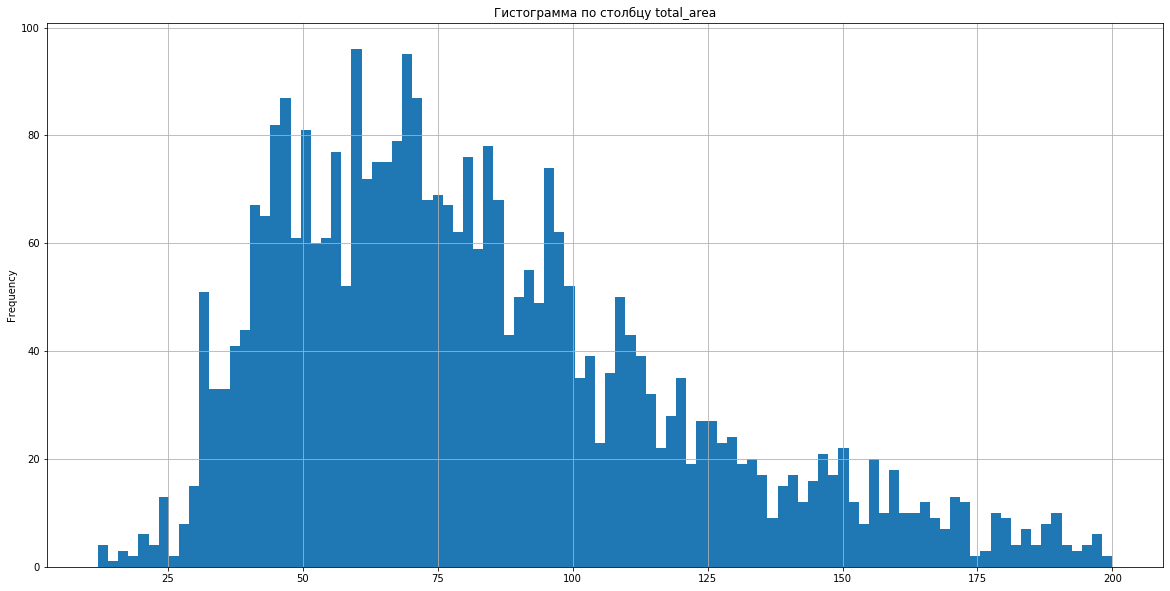

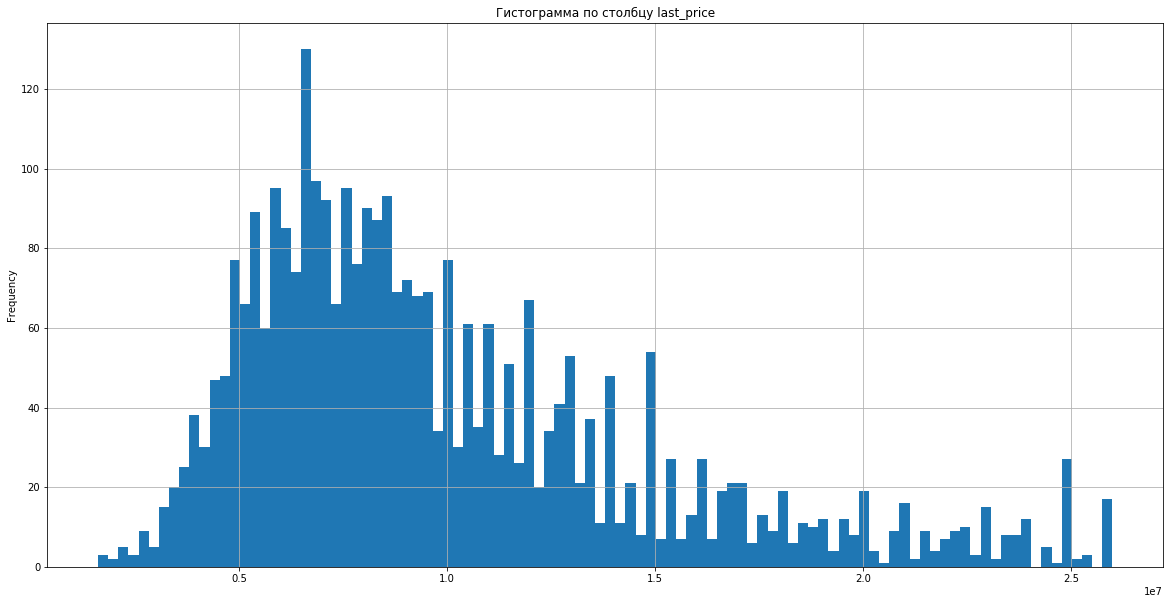

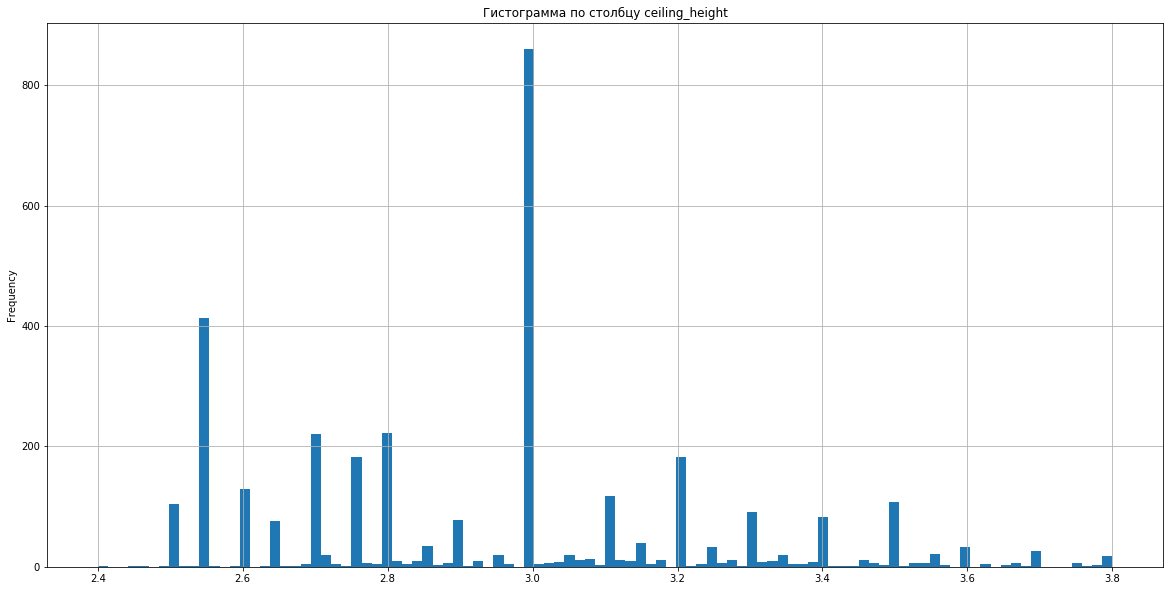

In [84]:
# построение гистограмм с помощью цикла
dict_of_columns_spb = {'total_area' : 200, 'last_price' : 26000000, 'ceiling_height' : 3.8}

for column in dict_of_columns_spb.keys():
    data_spb_center[data_spb_center[column] <= dict_of_columns_spb[column]][column].plot(kind = 'hist', figsize = (20,10), grid=True, bins=100)
    plt.title('Гистограмма по столбцу ' + column)
    plt.show()

Теперь гистограммы выглядят намного информативнее. Самые часто встречающиеся квартиры в центре имеют площадь от 60 до 100 м². Квартир площадью от 100 до 125 м² всего примерно на треть меньше, чем самых популярных. 

По цене наибольшее количество значений наблюдается в интервале от 5 до 10 млн руб. Квартир за 10-15 млн руб в половину меньше, чем предыдущей ценовой категории.

По высоте потолков виден один большой максимум на отметке 3 м - это самое часто встречающееся значение. На втором месте по частоте - 2.55 м, но таких потолков уже вдвое меньше, чем 3-метровых. Примерно одинковое количество квартир в выборке с потолками высотой 2.7, 2.8 и 3.2 м - но количество каждого значения в четыре раза меньше максимальной частоты.

Изучим, как влияют на цену квартиры такие факторы, как число комнат, этаж, удалённость от центра, дата размещения объявления. Для этого отфильтруем датафрейм data_spb_center по общей площади, цене и числу комнат:
- общая площадь до 300 м²;
- количество комнат до 10 включительно;
- цена до 35 000 000 руб.

Посчитаем, какой процент данных мы потеряем, если избавимся от таких выбросов.

In [85]:
print('Если убрать из набора данных квартир в центре города такие квартиры, которые имеют более 10 комнат, площадью более 300 м² и стоимостью выше 35 млн руб, то мы потеряем {:.1%} данных.'.format(len(data_spb_center.query('(last_price > 35000000) or (rooms > 10) or (total_area > 300)')) / len(data_spb_center)))

Если убрать из набора данных квартир в центре города такие квартиры, которые имеют более 10 комнат, площадью более 300 м² и стоимостью выше 35 млн руб, то мы потеряем 6.6% данных.


Сохраним отфильтрованные данные в отдельный датафрейм, применив метод .query().

In [86]:
# датафрейм, содержащий объявления о продаже квартир в центре, имеющих не более 10 комнат,
# площадью не более 300 м² и стоимостью до 35 млн руб.
filtered_data_spb_center = data_spb_center.query('(last_price <= 35000000) and (rooms <= 10) and (total_area <= 300)')

По аналогии с данными по всему городу, постороим графики зависимости цены от каждого из параметров и посчитаем корреляцию по данным отфильтрованного датафрейма filtered_data_spb_center.

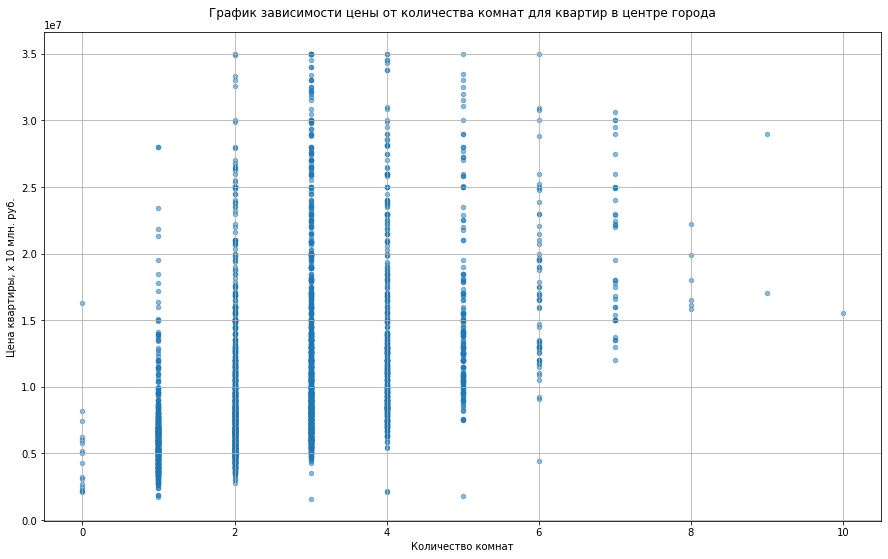

In [87]:
ax = filtered_data_spb_center.plot(x='rooms', y='last_price', kind='scatter', figsize=(15, 9), grid=True, alpha=0.5)
ax.set_title('График зависимости цены от количества комнат для квартир в центре города', pad=15)
ax.set_xlabel('Количество комнат')
ax.set_ylabel('Цена квартиры, х 10 млн. руб.')
plt.show()

In [88]:
print('Корреляция между количеством комнат и ценой квартир в центре города:', filtered_data_spb_center['rooms'].corr(filtered_data_spb_center['last_price']))

Корреляция между количеством комнат и ценой квартир в центре города: 0.4564388063049636


Цена квартир в центре Санкт-Петербурга зависит от количества комнат, но связь не слишком сильная. Здесь мы видим картину зависимости практически такую же, как и в целом по городу.

График зависимости средней стоимости квартиры от типа этажа для квартир в центре города:

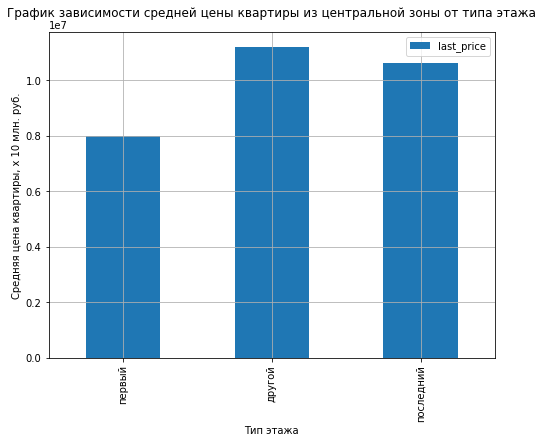

In [89]:
ax = filtered_data_spb_center.pivot_table(index='floor_type', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(8, 6), grid=True)
ax.set_xticklabels(labels_floor)
ax.set_title('График зависимости средней цены квартиры из центральной зоны от типа этажа', pad=15)
ax.set_xlabel('Тип этажа')
ax.set_ylabel('Средняя цена квартиры, х 10 млн. руб.')
plt.show()

Корреляция между типом этажа и ценой квартир для квартир в центре города:

In [90]:
print('Корреляция между типом этажа и ценой квартир в центре города:', filtered_data_spb_center['floor_type'].corr(filtered_data_spb_center['last_price']))

Корреляция между типом этажа и ценой квартир в центре города: 0.0885677300375409


Здесь, также как и в целом по городу, видно сильное отличие средней цены квартир на первых этажах от средней цены квартир на остальных этажах. При этом разница между средними стоимостями квартир на промежуточных (других) этажах и последних маленькая (единицы процентов).

График зависимости цены от удалённости квартиры от центра Санкт-Петербурга для квартир в центре Санкт-Петербурга:

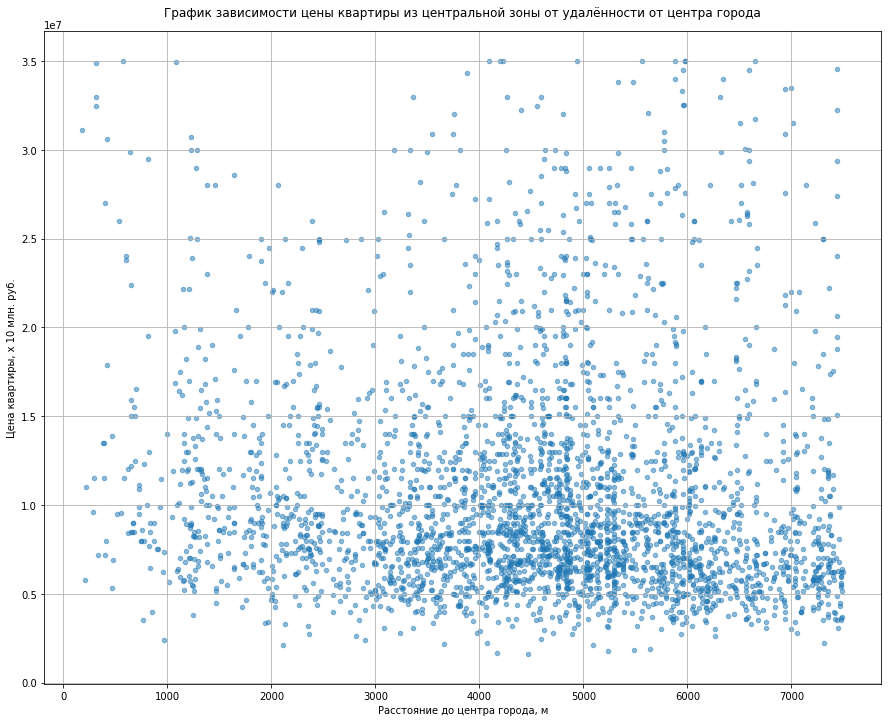

In [91]:
ax = filtered_data_spb_center.plot(x='cityCenters_nearest', y='last_price', kind='scatter', figsize=(15, 12), grid=True, alpha=0.5)
ax.set_title('График зависимости цены квартиры из центральной зоны от удалённости от центра города', pad=15)
ax.set_xlabel('Расстояние до центра города, м')
ax.set_ylabel('Цена квартиры, х 10 млн. руб.')
plt.show()

График показывает практическое отсутствие зависимости между параметрами 'last_price' и 'cityCenters_nearest'. В пределах семикилометрового радиуса это кажется закономерным явлением. Построим теперь график зависимости средней цены от удалённости от центра в километрах.

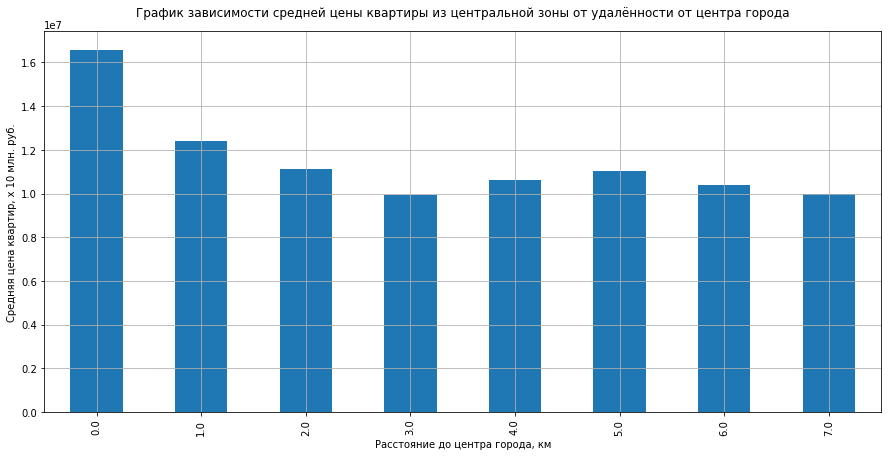

In [92]:
ax = filtered_data_spb_center.groupby('cityCenters_nearest_km')['last_price'].mean().plot(kind='bar', figsize=(15, 7), grid=True)
ax.set_title('График зависимости средней цены квартиры из центральной зоны от удалённости от центра города', pad=15)
ax.set_xlabel('Расстояние до центра города, км')
ax.set_ylabel('Средняя цена квартир, х 10 млн. руб.')
plt.show()

Видно снижение от 0 до 2 км, а после изменения цены невелики. Скорее всего, есть небольшая отрицательная корелляция, выведем её значение на экран:

In [93]:
print('Корреляция между удалённостью от центра города и ценой квартир в центре города:', filtered_data_spb_center['cityCenters_nearest'].corr(filtered_data_spb_center['last_price']))

Корреляция между удалённостью от центра города и ценой квартир в центре города: -0.07050937727915499


Предположение подтвердилось - есть тенденция к снижению цены с увеличением расстояния от центра, но в целом зависимость очень слабая.


График зависимости средней стоимости квартиры в центре города от дня недели размещения объявления:

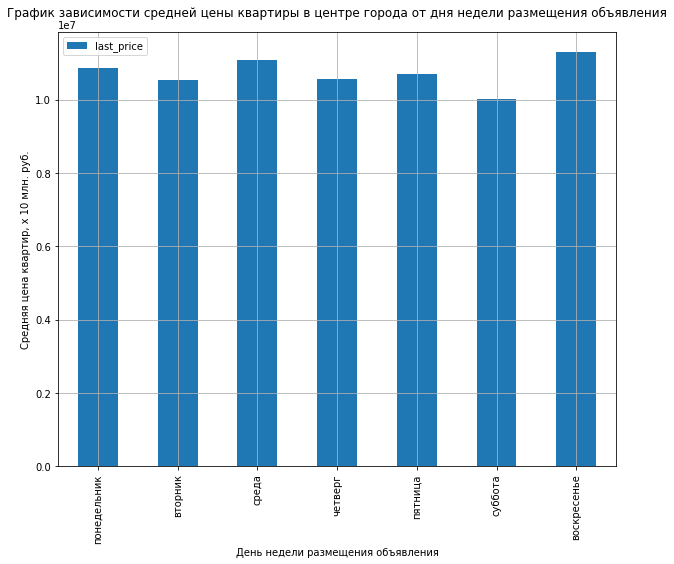

In [94]:
ax = filtered_data_spb_center.pivot_table(index='weekday_exposition', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(10, 8), grid=True)
ax.set_xticklabels(labels)
ax.set_title('График зависимости средней цены квартиры в центре города от дня недели размещения объявления', pad=15)
ax.set_xlabel('День недели размещения объявления')
ax.set_ylabel('Средняя цена квартир, х 10 млн. руб.')
plt.show()

Корреляция между днём недели размещения объявлений и ценой квартир в центре города:

In [95]:
print('Корреляция между днём недели размещения объявлений и ценой квартир в центре города:', filtered_data_spb_center['weekday_exposition'].corr(filtered_data_spb_center['last_price']))

Корреляция между днём недели размещения объявлений и ценой квартир в центре города: -0.007785642730074869


Практически нулевое значение корреляции, но на столбчатой диаграмме видна интересная закономерность - самая высокая средняя цена у квартир, размещённых в воскресенье! Она даже выше пика будней - среды. А самая низкая средняя стоимость у "субботних" квартир.

Построим график зависимости средней цены квартиры в центре города от месяца и года размещения объявления:

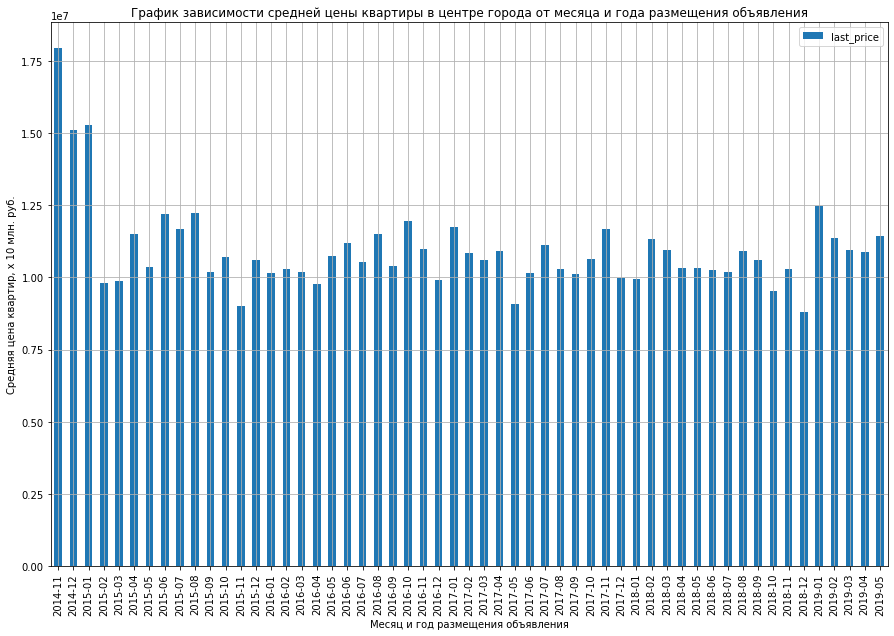

In [96]:
ax = filtered_data_spb_center.pivot_table(index='month_year_exposition', values='last_price', aggfunc='mean').plot(kind='bar', figsize=(15, 10), grid=True)
plt.title('График зависимости средней цены квартиры в центре города от месяца и года размещения объявления')
ax.set_xlabel('Месяц и год размещения объявления')
ax.set_ylabel('Средняя цена квартир, х 10 млн. руб.')
plt.show()

Как и для квартир в целом по городу, здесь также наблюдается максимальное значение средней стоимости в ноябре 2014. В последующие 2 месяца средняя цена размещаемых к продаже квартир в центре города снизилась - примерно на 2,5 млн руб или на 14%. А в феврале-марте 2015 наблюдается стремительный спад от 15 млн до отметки менее 10 млн руб. Начиная с апреля 2015 средняя цена снова немного выросла. После этого и до конца рассматриваемого периода она не поднималась выше 12,5 млн руб, но и не снижалась ниже 10 млн руб, за исключением нескольких локальных минимумов (ноябрь 2015, апрель 2016, декабрь 2016, май 2017, октябрь 2018 и декабрь 2018). В целом о наличии какой-то определённой закономерности здесь говорить нельзя: цена с течением времени то падает, то вновь растёт.

**Вывод**

Анализируя квартиры в целом и квартиры в центре Санкт-Петербурга, мы увидели, что квартиры в центре дороже, больше и в целом более комфортабельны. Об этом говорит численное описание выборок - медианная цена общей выборки квартир вдвое меньше, чем выборки квартир из центральной зоны (4 650 000 руб и 9 200 000 руб соответственно). Средняя площадь квартиры в центре составляет 93,131 м², а средняя площадь по всему городу на треть меньше - 60,343 м². Если среднее число комнат в квартире в центре - это 3, то по всему городу - всего 2. Видно к тому же неодинаковое распределение количества объявлений по количеству комнат: для общей выборки преобладают 1- и 2-комнатные квартиры, а для выборки квартир в центре - 2- и 3-комнатные.

Даже медианная высота потолков значительно отличается - для центра - 3 м, для общей выборки - 2,65 м.

Кроме того, зависимость цены от таких параметров, как число комнат, тип этажа, удалённость от центра, день недели и месяц и год размещения объявления для квартир в центре и для квартир в целом по городу тоже не всегда совпадает. Сходство мы наблюдали во влиянии на стоимость количества комнат (ощутимая положительная корреляция) и месяца-года размещения объявления (и в первом, и во втором случае видимой закономерности не обнаружено).

По-разному зависит цена от типа этажа. Если в целом по городу среднее значение цены для квартир на первых этажах меньше на 20%, чем на промежуточных (других), то для квартир в центре города этот процент достигает 27%. Интересно влияние дня размещения объявления на среднюю стоимость: в общей выборке минимумы и максимумы по дням недели были слабо различимы, при этом максимум средней стоимости наблюдался для квартир, размещённых в продажу во вторник. В выборке по центру города уже видны более заметные различия по дням недели, а максимум средней цены соответствовал воскресенью.

В общей выборке хорошо прослеживается снижение цены в зависимости от удалённости от центра, а в выборке центральной зоны корреляции практически нет.

## Общий вывод

Изучив такие параметры как площадь, цена, число комнат, высота потолков, мы увидели, что редкие и выбивающиеся значения сильно влияют на среднее и затрудняют анализ данных. В следствие этого вывода были выявлены редкие и выбивающиеся значения, которые мы исключили из выборки, предназначенной для дальнейшего анализа. Для сравнения, средняя цена квартиры до исключения редких значений составляла 6 543 086,50 руб, а после - 4 849 284,50 руб.

Изучение времени продажи квартиры дало понимание, какую продажу считать быстрой (1,5 месяца), а какую - необычно долгой (2,5 года).

Проанализировав 10 населённых пунктов с наибольшим числом объявлений, мы нашли города с самой высокой (в топе - Санкт-Петербург с ценой 114 840.18 руб. за 1 м²) и с самой низкой стоимостью (например, Выборг, со стоимостью 1 м² 58 141.91 руб.) за квадратный метр.

Анализ влияния нескольких факторов (общая площадь, число комнат, тип этажа (первый, другой или последний), удалённость от центра, дата размещения: день недели, месяц-год) на цену квартиры привёл нас к следующим выводам:
- наибольшее влияние на цену оказывает площадь жилья (корреляция составила 0.7), а вот количество комнат влияет на цену в меньшей степени (значение корреляции 0.44);
- квартиры на первом этаже стоят в среднем на 20% дешевле относительно квартир на других этажах, а на последних этажах - на 10% дешевле, чем на других;
- цена отрицательно коррелирует с удалённостью от центра - чем больше удалённость, тем ниже цена;
- цена практически никак не связана с датой размещения объявления - мы наблюдали практически нулевую корреляцию.

Исследование влияния удалённости от центра на стоимость квадратного метра жилья помогло нам выделить центральную зону города - в пределах радиуса в 7 км. Было также изучено, как стоимость квартиры зависит от тех же пяти факторов, при условии если квартира находится в центре. Получилось, что цена по-разному зависит от этих факторов, если сравнивать квартиры в общей выборке и квартиры в центре. Например, мы выявили более значительное влияние типа этажа на цену (квартиры на первых этажах в среднем на 27% дешевле квартир на промежуточных этажах). А сравнивая числовые характеристики, отчетливо видно, что в центре квартиры не только дороже, но и больше и комфортабельней.